**ASSIGNMENT-2**

**ABSTRACT**

The objective was to develop a reliable model for accurately predicting hunting prices.

With this model, we can gain insight into the motivations underlying the choice to hunt a particular type or rarity of large mammal, as well as examine correlations with variables such as body size, carnivory and classification, conservation status, and geographical location

The model was then applied to the Hunting Prices dataset for testing. Analysis of the data and model testing revealed that the linear regression approach can effectively predict and analyze housing prices to a certain degree. However, further improvements can be made by exploring more advanced machine learning techniques.

DATASET

The dataset can be found here - https://www.kaggle.com/datasets/thedevastator/hunt-prices-for-north-american-mammals

This dataset provides information on the cost and duration of guided hunts for fifteen different North American large mammal species, allowing for exploration of costly signaling theory

Notes on Specific Variables:

Species: The name of the species of mammal being hunted. (Text)

Province/State: The province or state in which the hunt took place. (Text)

Price: The total cost of the hunt. (Numerical)

Number of days: The number of days the hunt lasted. (Numerical)

Day price: The cost per day of the hunt. (Numerical)

S Rank: The rarity of the species being hunted. (Numerical)

Status: The conservation status of the species being hunted. (Text)

Classification: The classification of the species being hunted (carnivore, omnivore, or herbivore). (Text)

Avg Mass: The average mass of the species being hunted. (Numerical)

SCI: The Safari Club International score of the species being hunted. (Numerical)

Latitude: The latitude of the location where the hunt took place. (Numerical)


**Importing required libraries and H2O initialization**

Automated Machine Learning (AutoML) streamlines the entire process of applying machine learning to practical scenarios. H2O AutoML handles fundamental data processing, model training, tuning, as well as Ensemble and stacking techniques, aiming to deliver optimal performance. This enables developers to concentrate on tasks such as data collection, feature engineering, and model deployment, without worrying about the intricacies of model optimization.

We are initializing H2O in the following steps.

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future


In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random
import os
import sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV



In [ ]:
min_mem_size = 6
run_time = 222

In [ ]:
import psutil

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)


0


In [ ]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.2+8-LTS-86, mixed mode, sharing)
  Starting server from C:\Users\subha\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\subha\AppData\Local\Temp\tmp5v79tdkv
  JVM stdout: C:\Users\subha\AppData\Local\Temp\tmp5v79tdkv\h2o_vineeth_started_from_python.out
  JVM stderr: C:\Users\subha\AppData\Local\Temp\tmp5v79tdkv\h2o_vineeth_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_vineeth_qsp8m6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.955 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Importing Data

Once H2O is initialized, in the below code we are importing the data into a h2o dataframe.

In [ ]:
url = "https://raw.githubusercontent.com/vineethreddy2000/Assignment-1_DS/main/Mihalikdata.csv"
df = h2o.import_file(path=url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.head()

Species,Province/State,Price,Number of days,Day price,S Rank,Status,Classification,Avg Mass,SCI,Latitude
Mountain Lion,Alberta,15930,10,1593,S4,4,Carnivore,60.4,Y,54.5
Mountain Lion,Alberta,9500,10,950,S4,4,Carnivore,60.4,Y,54.5
Mountain Lion,Alberta,10000,10,1000,S4,4,Carnivore,60.4,Y,54.5
Mountain Lion,Alberta,12500,10,1250,S4,4,Carnivore,60.4,Y,54.5
Mountain Lion,Arizona,5000,5,1000,S4,4,Carnivore,60.4,Y,34.1661
Mountain Lion,Arizona,7500,7,1071,S4,4,Carnivore,60.4,Y,34.1661
Mountain Lion,Arizona,4000,7,571,S4,4,Carnivore,60.4,Y,34.1661
Mountain Lion,Arizona,5000,6,833,S4,4,Carnivore,60.4,Y,34.1661
Mountain Lion,Arizona,4500,5,900,S4,4,Carnivore,60.4,Y,34.1661
Mountain Lion,Arizona,6500,6,1083,S4,4,Carnivore,60.4,Y,34.1661


In [ ]:
df.describe()

Rows:721
Cols:11

,Species,Province/State,Price,Number of days,Day price,S Rank,Status,Classification,Avg Mass,SCI,Latitude
type,enum,enum,int,real,int,enum,real,enum,real,enum,real
mins,,,800.0,2.0,200.0,,1.0,,45.0,,28.0585655
mean,,,7896.6393897364715,6.370943134535359,1108.5880721220537,,4.397626112759645,,175.33567267683776,,46.451334160194115
maxs,,,60000.0,16.0,8571.0,,5.0,,416.25,,69.3764755
sigma,,,8265.37735108874,2.4996740783851634,695.6616601175659,,0.8289309983170492,,130.3785625234943,,9.97207707596964
zeros,,,0,0,0,,0,,0,,0
missing,0,0,0,0,0,47,47,0,0,0,0
0,Mountain Lion,Alberta,15930.0,10.0,1593.0,S4,4.0,Carnivore,60.4,Y,54.5
1,Mountain Lion,Alberta,9500.0,10.0,950.0,S4,4.0,Carnivore,60.4,Y,54.5
2,Mountain Lion,Alberta,10000.0,10.0,1000.0,S4,4.0,Carnivore,60.4,Y,54.5


In [ ]:
df.types

{'Species': 'enum',
 'Province/State': 'enum',
 'Price': 'int',
 'Number of days': 'real',
 'Day price': 'int',
 'S Rank': 'enum',
 'Status': 'real',
 'Classification': 'enum',
 'Avg Mass': 'real',
 'SCI': 'enum',
 'Latitude': 'real'}

In [ ]:
df.shape

(721, 11)

In [ ]:
print('missing:', df.isna().sum())

missing: 94.0


Check for missing values in the dataset

In [ ]:
# Impute missing values in 'Status' column with mode
df['Status'].impute(method='mode')

[4.397626112759645]

Impute missing values with 'mode'

In [ ]:
# Impute missing values in 'S Rank' column with mode
df['S Rank'].impute(method='mode')


[6.0]

In [ ]:
print('missing:', df.isna().sum())

missing: 0.0


In [ ]:
df.describe()

Rows:721
Cols:11

,Species,Province/State,Price,Number of days,Day price,S Rank,Status,Classification,Avg Mass,SCI,Latitude
type,enum,enum,int,real,int,enum,real,enum,real,enum,real
mins,,,800.0,2.0,200.0,,1.0,,45.0,,28.0585655
mean,,,7896.6393897364715,6.370943134535359,1108.5880721220537,,4.397626112759645,,175.33567267683776,,46.451334160194115
maxs,,,60000.0,16.0,8571.0,,5.0,,416.25,,69.3764755
sigma,,,8265.37735108874,2.4996740783851634,695.6616601175659,,0.8289309983170492,,130.3785625234943,,9.97207707596964
zeros,,,0,0,0,,0,,0,,0
missing,0,0,0,0,0,47,47,0,0,0,0
0,Mountain Lion,Alberta,15930.0,10.0,1593.0,S4,4.0,Carnivore,60.4,Y,54.5
1,Mountain Lion,Alberta,9500.0,10.0,950.0,S4,4.0,Carnivore,60.4,Y,54.5
2,Mountain Lion,Alberta,10000.0,10.0,1000.0,S4,4.0,Carnivore,60.4,Y,54.5


In [ ]:
# Create a 80/20 train/test split
pct_rows = 0.80
df_train, df_test = df.split_frame([pct_rows])


In [ ]:
print(df_train.shape)
print(df_test.shape)

(587, 11)
(134, 11)


In [ ]:
#Display all columns in X
X=df.columns
print(X)

['Species', 'Province/State', 'Price', 'Number of days', 'Day price', 'S Rank', 'Status', 'Classification', 'Avg Mass', 'SCI', 'Latitude']


In [ ]:
#Seperate Dependent variable from Independent variable
y_numeric ='Price'
X.remove(y_numeric)
print(X)

['Species', 'Province/State', 'Number of days', 'Day price', 'S Rank', 'Status', 'Classification', 'Avg Mass', 'SCI', 'Latitude']


H2O AUTOML EXECUTION

Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time..

In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |
19:05:44.188: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),2/5
# GBM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


Model Key and Summary:

The model key indicates the identifier for the trained model.

Stacking strategy employed is "cross-validation", which suggests that the Stacked Ensemble model was built using cross-validation techniques.

Among the available base models, only 2 out of 5 were utilized in the ensemble. These included 1 Gradient Boosting Machine (GBM) and 1 Deep Learning model.

The metalearner algorithm used was Generalized Linear Model (GLM) with 5-fold cross-validation for training.

ModelMetrics on Train Data:

The metrics evaluated on the training data provide insights into how well the model fits the training set.

The relatively low values of MSE, RMSE, and MAE indicate that the model performs well on the training data, with RMSE around 520 and R-squared (R^2) very close to 1, indicating a high degree of explained variance.

ModelMetrics on Cross-validation Data:

The metrics evaluated on cross-validation data provide an estimate of how well the model might perform on unseen data.

Although the metrics are slightly worse compared to the training data, the performance is still quite good. The RMSE is around 1054, indicating the average prediction error is about 1054.3 units.

The R-squared value of approximately 0.983 suggests that the model explains around 98.3% of the variance in the target variable, which is quite high and indicates a good fit.


In [ ]:
print(aml.leaderboard)

model_id                                                    rmse          mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_190544  1054.37  1.11169e+06  592.725  0.138386               1.11169e+06
StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_190544  1097.14  1.20373e+06  610.138  0.14606                1.20373e+06
StackedEnsemble_AllModels_2_AutoML_1_20240219_190544     1121.07  1.25681e+06  620.722  0.145673               1.25681e+06
GBM_grid_1_AutoML_1_20240219_190544_model_17             1243.85  1.54715e+06  586.274  0.114181               1.54715e+06
DeepLearning_1_AutoML_1_20240219_190544                  1277.39  1.63173e+06  905.316  0.236042               1.63173e+06
StackedEnsemble_BestOfFamily_5_AutoML_1_20240219_190544  1299.37  1.68837e+06  606.175  0.114588               1.68837e+06
GBM_grid_1_AutoML_1_20240219_190544_model_164            1318.7   1.73898e+06  622.094  0.123458               1.73898e+06
GBM_grid_1_AutoM

Top Performing Model:

The Stacked Ensemble model with ID "StackedEnsemble_BestOfFamily_4_AutoML_1_20240218_165858" is identified as the best-performing model.

It achieved the lowest RMSE (Root Mean Squared Error), indicating superior predictive accuracy.


Key Metrics:

The output provides essential metrics such as RMSE, MSE, MAE, RMSLE, and mean residual deviance for each model.

These metrics help evaluate the performance and predictive accuracy of the models.


Model Rankings:

GBM (Gradient Boosting Machine) models are also included in the comparison.


However, the Stacked Ensemble model outperforms them, as it achieved the lowest RMSE among all models.

In [ ]:
url="https://raw.githubusercontent.com/vineethreddy2000/Assignment-1_DS/main/Mihalikdata.csv"
dfpd=pd.read_csv(url)

In [ ]:
dfpd.isnull().sum()

Species            0
Province/State     0
Price              0
Number of days     0
Day price          0
S Rank            47
Status            47
Classification     0
Avg Mass           0
SCI                0
Latitude           0
dtype: int64

In [ ]:
# Impute missing values in 'S Rank' with the mode (most frequent rank)
dfpd['S Rank'].fillna(dfpd['S Rank'].mode().iloc[0], inplace=True)
dfpd['Status'].fillna(dfpd['Status'].mode().iloc[0], inplace=True)

In [ ]:
dfpd.isnull().sum()

Species           0
Province/State    0
Price             0
Number of days    0
Day price         0
S Rank            0
Status            0
Classification    0
Avg Mass          0
SCI               0
Latitude          0
dtype: int64

Analysing relation between all variables

We'll assess the Variance Inflation Factor (VIF) for all variables to examine potential multicollinearity among the independent variables. Variables with a high VIF indicate significant correlation with other variables. In such instances, we'll consider removing these variables to address multicollinearity.

In [ ]:
# Create dummy variables for all columns
data = pd.get_dummies(dfpd)

from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = data[['Number of days', 'Day price','Status','Avg Mass','Latitude']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,Number of days,13.377695
1,Day price,5.149211
2,Status,13.936347
3,Avg Mass,3.111610
4,Latitude,34.883556


In [ ]:
data.head()

,Price,Number of days,Day price,Status,Avg Mass,Latitude,Species_Bighorn Sheep,Species_Black Bear,Species_Brown Bear,Species_Caribou,...,S Rank_S2S3,S Rank_S3,S Rank_S3S4,S Rank_S4,S Rank_S5,S Rank_S5,Classification_Carnivore,Classification_Ungulate,SCI_N,SCI_Y
0,15930,10.0,1593,4.0,60.4,54.5000,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
1,9500,10.0,950,4.0,60.4,54.5000,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
2,10000,10.0,1000,4.0,60.4,54.5000,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
3,12500,10.0,1250,4.0,60.4,54.5000,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
4,5000,5.0,1000,4.0,60.4,34.1661,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True


In [ ]:
# Convert boolean columns to numeric (0 and 1)
data["Species_Thinhorn Sheep"] = data["Species_Thinhorn Sheep"].astype(int)
data["SCI_N"] = data["SCI_N"].astype(int)
data["SCI_Y"] = data["SCI_Y"].astype(int)
data["Species_Polar Bear"] = data["Species_Polar Bear"].astype(int)
data["S Rank_S5"] = data["S Rank_S5"].astype(int)
data["Province/State_British Columbia"] = data["Province/State_British Columbia"].astype(int)
data["Classification_Ungulate"] = data["Classification_Ungulate"].astype(int)
data["Province/State_Alberta"] = data["Province/State_Alberta"].astype(int)
data["Species_Bighorn Sheep"] = data["Species_Bighorn Sheep"].astype(int)
data["Species_Black Bear"] = data["Species_Black Bear"].astype(int)

from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = data[['Number of days', 'Day price','Status','Avg Mass','Latitude', 'Species_Thinhorn Sheep', 'SCI_N', 'SCI_Y', 'Species_Polar Bear', 'S Rank_S5', 'Province/State_British Columbia', 'Classification_Ungulate', 'Province/State_Alberta', 'Species_Bighorn Sheep', 'Species_Black Bear']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,Number of days,2.695955
1,Day price,1.898639
2,Status,4.227057
3,Avg Mass,1.664310
4,Latitude,2.100059
5,Species_Thinhorn Sheep,1.629481
6,SCI_N,60.089821
7,SCI_Y,67.925377
8,Species_Polar Bear,1.338927
9,S Rank_S5,4.240825


VIF value for 'SCI_N' and 'SCI_Y' is high and since 'SCI_N' and 'SCI_Y' are perfectly negatively correlated with each other (-1), which is expected since they are likely binary indicators and exact opposites of each other. Including both in a regression model would be redundant and could inflate the variance of the coefficient estimates due to multicollinearity. Selecting only one of them is efficient.

Ordinary least squares (OLS) regression is a statistical technique utilized in multivariate analysis to estimate the relationship between one or more independent variables and a dependent variable. This method determines the relationship by minimizing the sum of squared differences between the observed and predicted values of the dependent variable.

In [ ]:
import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(
    data["Price"],
    data[
        [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "SCI_N",
            "Species_Polar Bear",
            "S Rank_S5",
            "Status",
            "Avg Mass",
            "Province/State_British Columbia",
            "Classification_Ungulate",
            "Province/State_Alberta",
            "Species_Bighorn Sheep",
            "Species_Black Bear",

            # Add other selected features here
        ]
    ],
).fit()

# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1614.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        19:11:27   Log-Likelihood:                         -6499.9
No. Observations:                 721   AIC:                                  1.303e+04
Df Residuals:                     707   BIC:                                  1.309e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

As seen from the OLS summary above, 'SCI-N' has a p value of 0.256 and has a very high VIF value. So, we'll try removing it and analyse the OLS summary again.
'Species_Black Bear' has a high p value of 0.832, Dropping them will give us a better model.

In [ ]:
import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(
    data["Price"],
    data[
        [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "Species_Polar Bear",
            "S Rank_S5",
            "Status",
            "Avg Mass",
            "Province/State_British Columbia",
            "Classification_Ungulate",
            "Province/State_Alberta",
            "Species_Bighorn Sheep",

            # Add other selected features here
        ]
    ],
).fit()

# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1882.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        19:11:31   Log-Likelihood:                         -6500.9
No. Observations:                 721   AIC:                                  1.303e+04
Df Residuals:                     709   BIC:                                  1.308e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

After removing 'species_black bear' and 'SCI_N' - the R-squared value did not change.
'Province/State_British Columbia' has p-value of 0.052. So, we will try dropping it and check the ols summary again.

In [ ]:
import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(
    data["Price"],
    data[
        [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "Species_Polar Bear",
            "S Rank_S5",
            "Status",
            "Avg Mass",
            "Classification_Ungulate",
            "Province/State_Alberta",
            "Species_Bighorn Sheep",

            # Add other selected features here
        ]
    ],
).fit()

# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              2045.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        19:11:36   Log-Likelihood:                         -6502.8
No. Observations:                 721   AIC:                                  1.303e+04
Df Residuals:                     710   BIC:                                  1.308e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Removed providence_state british columbia - not that much difference in R-squared value (p value relatively high)

In [ ]:
import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(
    data["Price"],
    data[
        [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "Species_Polar Bear",
            "S Rank_S5",
            "Status",
            "Classification_Ungulate",
            "Province/State_Alberta",
            "Species_Bighorn Sheep",

            # Add other selected features here
        ]
    ],
).fit()

# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              2237.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        19:11:40   Log-Likelihood:                         -6505.3
No. Observations:                 721   AIC:                                  1.303e+04
Df Residuals:                     711   BIC:                                  1.308e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Removed Avg_Mass - no difference in R-squared value

In [ ]:
import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(
    data["Price"],
    data[
        [
            "Day price",
            "Number of days",
            "Latitude",
            "Species_Thinhorn Sheep",
            "Species_Polar Bear",
            "S Rank_S5",
            "Status",
            "Classification_Ungulate",
            "Province/State_Alberta",

            # Add other selected features here
        ]
    ],
).fit()

# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              2479.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        19:11:44   Log-Likelihood:                         -6506.7
No. Observations:                 721   AIC:                                  1.303e+04
Df Residuals:                     712   BIC:                                  1.307e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Removed species_sheep bighorn - no difference in r^2 value

The model exhibits a high R-squared value (0.969), indicating that approximately 96.9% of the variance in the dependent variable (Price) is explained by the independent variables.

The F-statistic is significant (p-value < 0.05), suggesting that the model as a whole is statistically significant.

Individual coefficients provide insights into the relationships between the independent variables and the dependent variable (Price).

Some variables, such as "Number of days" and "Species_Thinhorn Sheep," appear to have significant positive effects on Price, while others like "Latitude" and "Status" have negative effects.

The presence of multicollinearity is indicated by a large condition number, suggesting potential issues with the model's stability.

In [ ]:
#Dopping the unecessary features as discussed above
dfpd1=data.drop(['Species_Black Bear','SCI_N','Province/State_British Columbia','Avg Mass','Species_Bighorn Sheep', 'SCI_Y'], axis=1)

In [ ]:
# Assuming dfpd1 is your DataFrame
selected_columns = [
    "Price",
    "Day price",
    "Number of days",
    "Latitude",
    "Species_Thinhorn Sheep",
    "Species_Polar Bear",
    "S Rank_S5",
    "Status",
    "Classification_Ungulate",
    "Province/State_Alberta",
    # Add other selected features here
]

# Selecting only the desired columns
dfpd1 = dfpd1[selected_columns]

In [ ]:
dfpd1

,Price,Day price,Number of days,Latitude,Species_Thinhorn Sheep,Species_Polar Bear,S Rank_S5,Status,Classification_Ungulate,Province/State_Alberta
0,15930,1593,10.0,54.5000,0,0,0,4.0,0,1
1,9500,950,10.0,54.5000,0,0,0,4.0,0,1
2,10000,1000,10.0,54.5000,0,0,0,4.0,0,1
3,12500,1250,10.0,54.5000,0,0,0,4.0,0,1
4,5000,1000,5.0,34.1661,0,0,0,4.0,0,0
...,...,...,...,...,...,...,...,...,...,...
716,6600,943,7.0,43.0000,0,0,1,5.0,1,0
717,6200,1240,5.0,43.0000,0,0,1,5.0,1,0
718,5450,908,6.0,43.0000,0,0,1,5.0,1,0
719,8000,1143,7.0,43.0000,0,0,1,5.0,1,0


In [ ]:
#Calculating correlation matrix for all variables
dfpd1.corr()

,Price,Day price,Number of days,Latitude,Species_Thinhorn Sheep,Species_Polar Bear,S Rank_S5,Status,Classification_Ungulate,Province/State_Alberta
Price,1.000000,0.903317,0.748216,0.554739,0.415525,0.358269,-0.350940,-0.312873,-0.054640,0.166856
Day price,0.903317,1.000000,0.480256,0.472469,0.321225,0.361683,-0.318303,-0.295568,-0.010787,0.134999
Number of days,0.748216,0.480256,1.000000,0.601676,0.350554,0.157535,-0.345681,-0.309670,-0.099964,0.137850
Latitude,0.554739,0.472469,0.601676,1.000000,0.287965,0.198343,-0.163378,-0.094355,-0.079075,0.174062
Species_Thinhorn Sheep,0.415525,0.321225,0.350554,0.287965,1.000000,-0.016252,-0.118744,-0.025855,0.093220,-0.038233
Species_Polar Bear,0.358269,0.361683,0.157535,0.198343,-0.016252,1.000000,-0.112323,-0.161595,-0.174335,-0.019742
S Rank_S5,-0.350940,-0.318303,-0.345681,-0.163378,-0.118744,-0.112323,1.000000,0.847657,0.307316,0.010756
Status,-0.312873,-0.295568,-0.309670,-0.094355,-0.025855,-0.161595,0.847657,1.000000,0.209469,0.037366
Classification_Ungulate,-0.054640,-0.010787,-0.099964,-0.079075,0.093220,-0.174335,0.307316,0.209469,1.000000,0.047819
Province/State_Alberta,0.166856,0.134999,0.137850,0.174062,-0.038233,-0.019742,0.010756,0.037366,0.047819,1.000000


Text(0.5, 1.0, 'Variable Correlation')

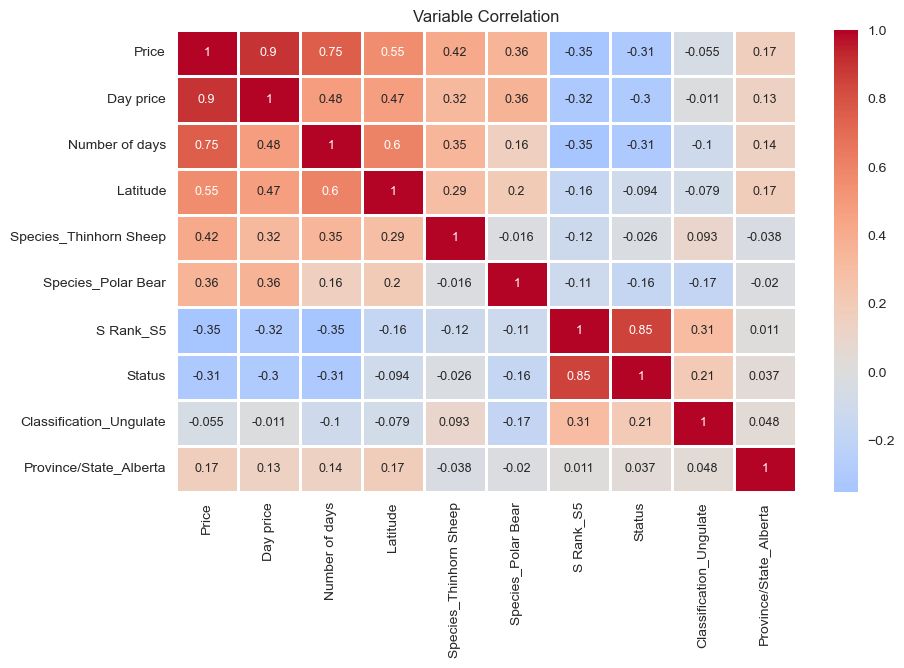

In [ ]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd1.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.

C:\Users\subha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


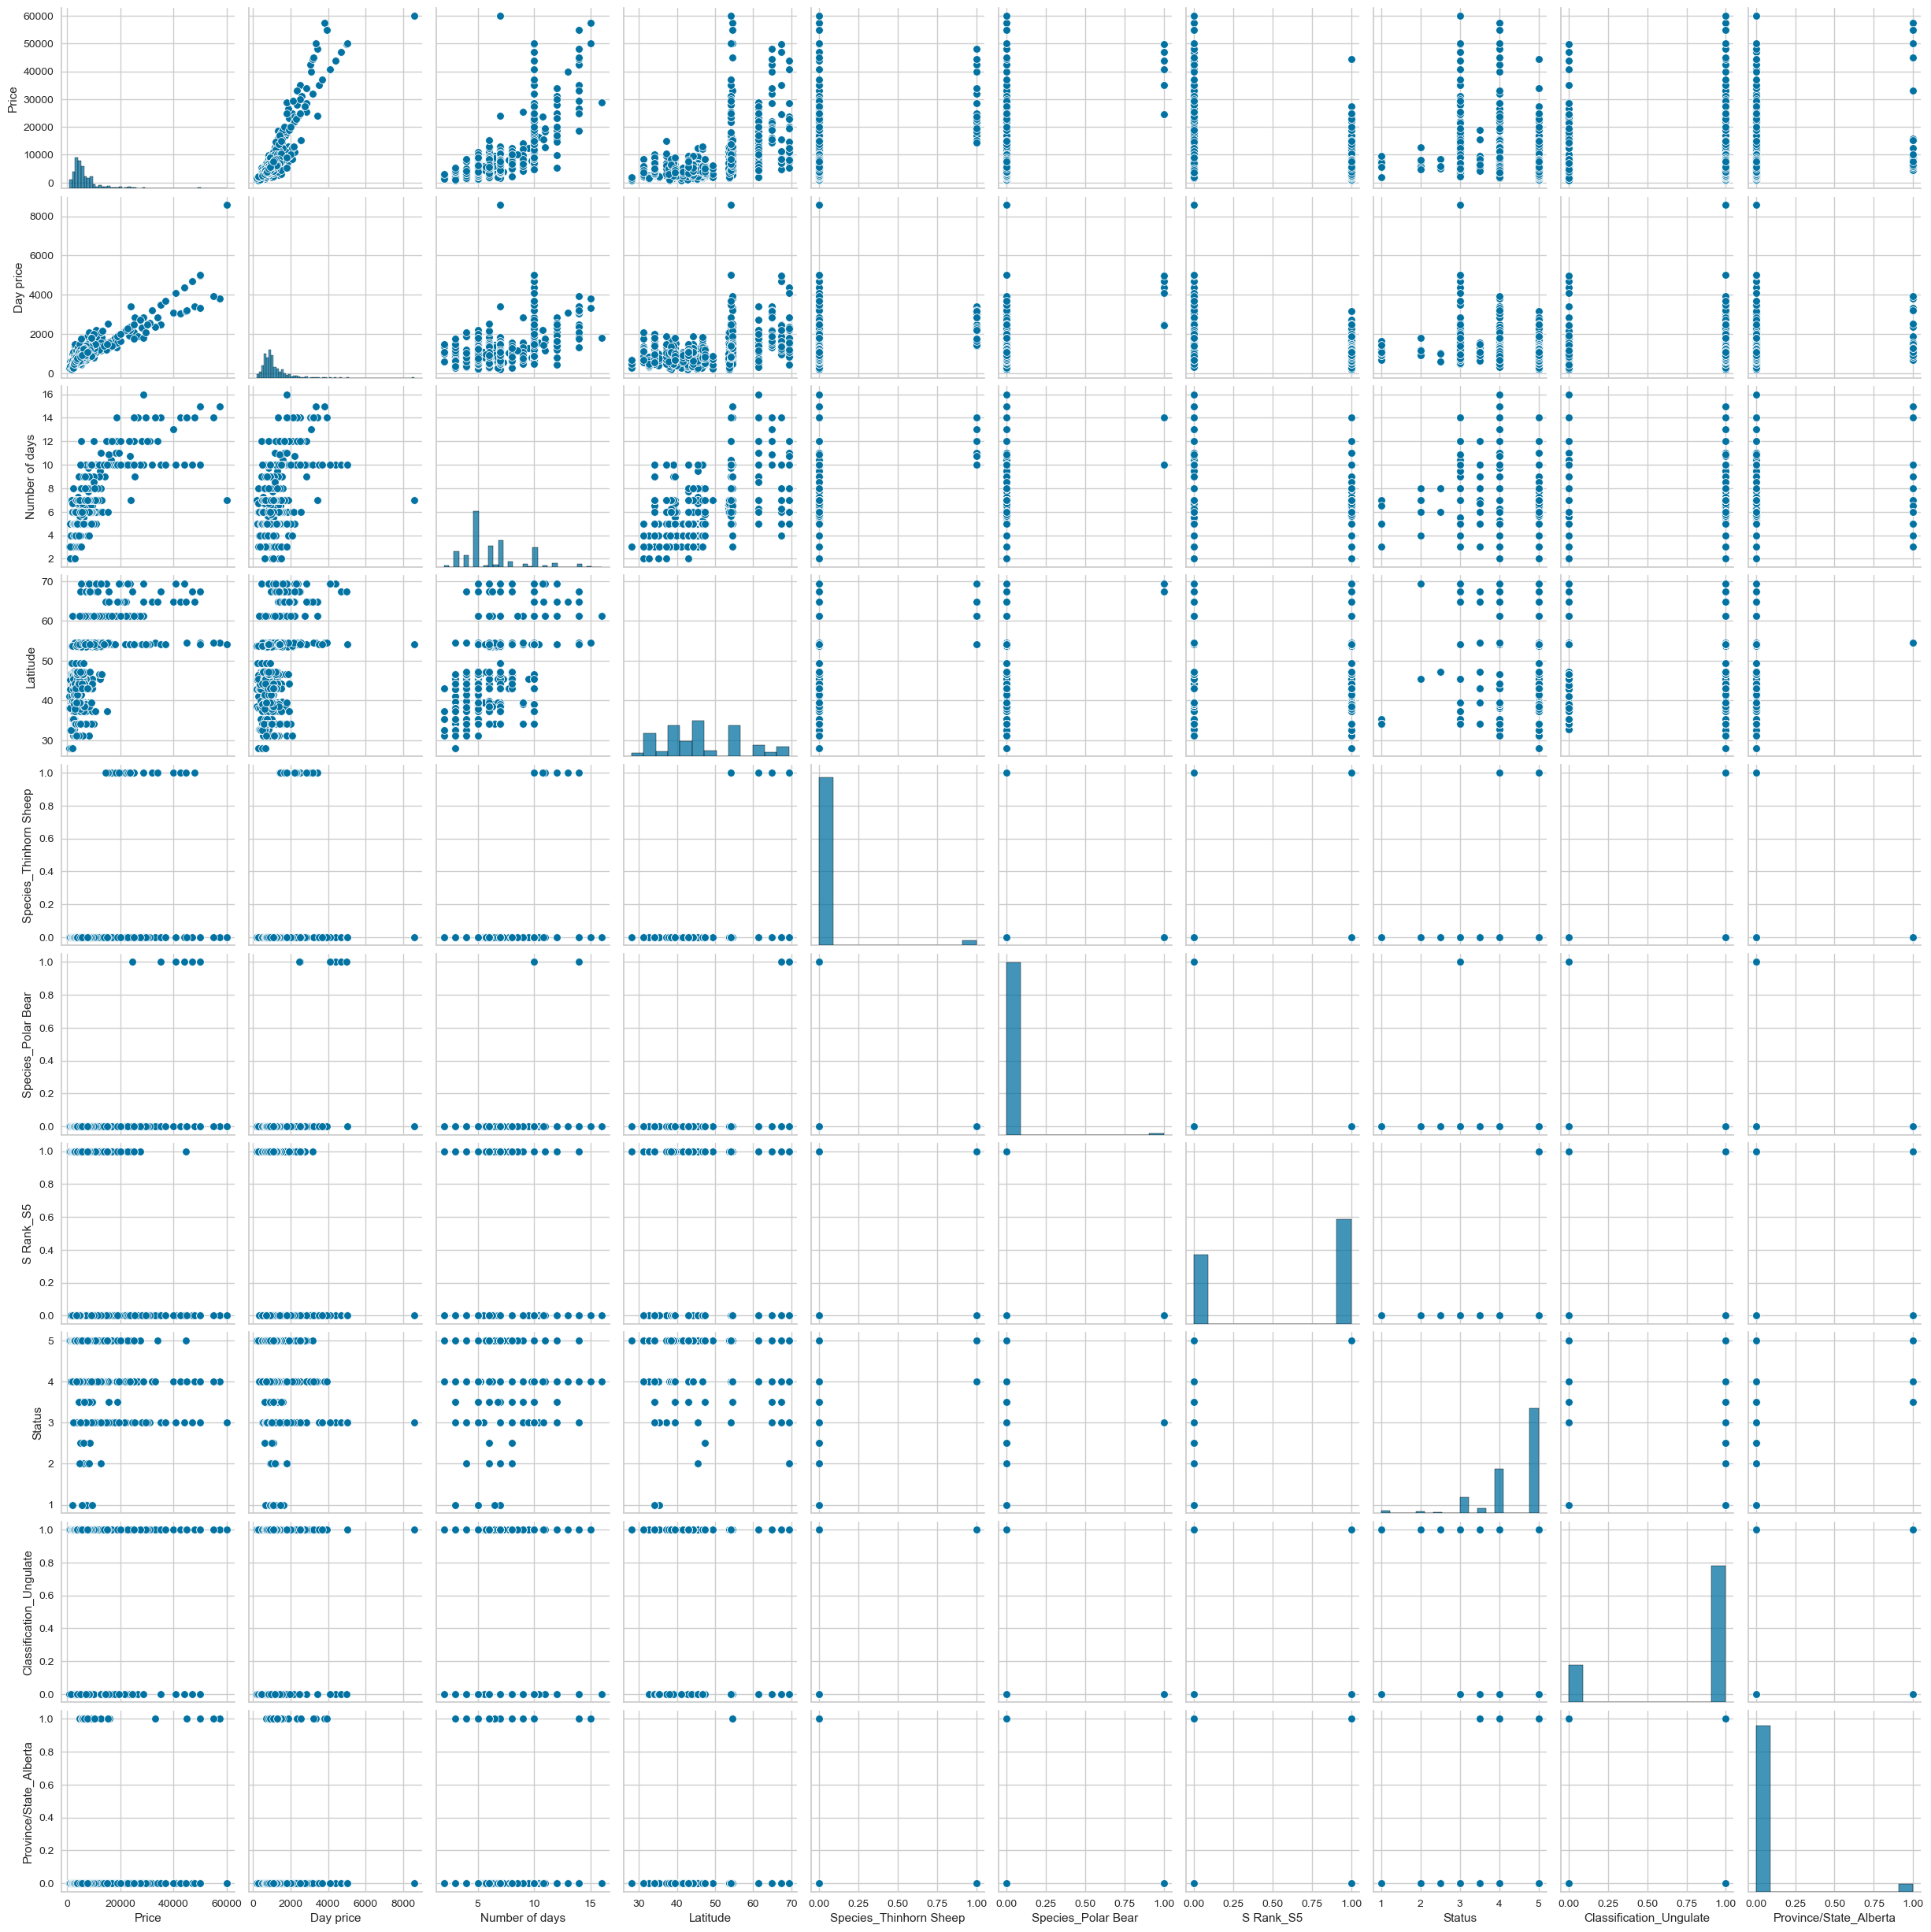

In [ ]:
sns.pairplot(dfpd1)


Variables such as "Price" and "Day price" exhibit a strong positive correlation (0.903).

"Number of days" also shows a moderately strong positive correlation with both "Price" (0.748) and "Day price" (0.480).

There are weaker correlations between other variables, such as "Latitude" and "Species_Thinhorn Sheep" (0.287), and "Species_Thinhorn Sheep" and "Species_Polar Bear" (0.016).

Negative correlations are observed between "S Rank_S5" and "Status" (-0.351), indicating a potential inverse relationship.

Since Day price is a very important feature for calculating the price of hunt of an animal. We will consider it in our model for further analysis.

In [ ]:
df

Species,Province/State,Price,Number of days,Day price,S Rank,Status,Classification,Avg Mass,SCI,Latitude
Mountain Lion,Alberta,15930,10,1593,S4,4,Carnivore,60.4,Y,54.5
Mountain Lion,Alberta,9500,10,950,S4,4,Carnivore,60.4,Y,54.5
Mountain Lion,Alberta,10000,10,1000,S4,4,Carnivore,60.4,Y,54.5
Mountain Lion,Alberta,12500,10,1250,S4,4,Carnivore,60.4,Y,54.5
Mountain Lion,Arizona,5000,5,1000,S4,4,Carnivore,60.4,Y,34.1661
Mountain Lion,Arizona,7500,7,1071,S4,4,Carnivore,60.4,Y,34.1661
Mountain Lion,Arizona,4000,7,571,S4,4,Carnivore,60.4,Y,34.1661
Mountain Lion,Arizona,5000,6,833,S4,4,Carnivore,60.4,Y,34.1661
Mountain Lion,Arizona,4500,5,900,S4,4,Carnivore,60.4,Y,34.1661
Mountain Lion,Arizona,6500,6,1083,S4,4,Carnivore,60.4,Y,34.1661


In [ ]:
df_h2o = h2o.H2OFrame(dfpd1)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
print(df_h2o.head())

  Price    Day price    Number of days    Latitude    Species_Thinhorn Sheep    Species_Polar Bear    S Rank_S5    Status    Classification_Ungulate    Province/State_Alberta
  15930         1593                10     54.5                            0                     0            0         4                          0                         1
   9500          950                10     54.5                            0                     0            0         4                          0                         1
  10000         1000                10     54.5                            0                     0            0         4                          0                         1
  12500         1250                10     54.5                            0                     0            0         4                          0                         1
   5000         1000                 5     34.1661                         0                     0            0         4    

H20 AutoML Rexecution on new model

Dropping the variables that are not significant for determining Price. Passing this new model again through H20AutoML. Here, we are repeating the entire process exactly as above whilst ignoring the unecessary features.

In [ ]:
df_h2o_train, df_h2o_test = df_h2o.split_frame([pct_rows])

In [ ]:
X1=df_h2o.columns
print(X1)

['Price', 'Day price', 'Number of days', 'Latitude', 'Species_Thinhorn Sheep', 'Species_Polar Bear', 'S Rank_S5', 'Status', 'Classification_Ungulate', 'Province/State_Alberta']


In [ ]:
#Seperate Dependent variable from Independent variable
y1_numeric ='Price'
X1.remove(y1_numeric)
print(X1)

['Day price', 'Number of days', 'Latitude', 'Species_Thinhorn Sheep', 'Species_Polar Bear', 'S Rank_S5', 'Status', 'Classification_Ungulate', 'Province/State_Alberta']


In [ ]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml1.train(x=X1,y=y1_numeric,training_frame=df_h2o_train)

AutoML progress: |
19:12:38.409: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),2/5
# GBM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


Comparison:

Both models have similar performance on the training set.

In terms of cross-validation performance, Model 2 has a lower RMSE (1054.3 vs. 996.2), RMSLE (0.13 vs. 0.07) and better R^2 value indicating better predictive accuracy.

Overall, both models are performing well, but Model 2 may have a slight edge in terms of predictive accuracy on unseen data.

In [ ]:
print(aml1.leaderboard)

model_id                                                     rmse               mse      mae      rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_2_20240219_191238   996.215  992444            416.258  0.0750563          992444
GBM_grid_1_AutoML_2_20240219_191238_model_47             1015.37        1.03097e+06  288.967  0.0559633               1.03097e+06
GBM_grid_1_AutoML_2_20240219_191238_model_178            1071.18        1.14742e+06  413.487  0.0788189               1.14742e+06
GBM_grid_1_AutoML_2_20240219_191238_model_258            1085.17        1.17759e+06  396.221  0.0835916               1.17759e+06
GBM_grid_1_AutoML_2_20240219_191238_model_293            1086.77        1.18106e+06  319.285  0.0645142               1.18106e+06
GBM_grid_1_AutoML_2_20240219_191238_model_181            1125.53        1.26681e+06  323.518  0.0593716               1.26681e+06
GBM_grid_1_AutoML_2_20240219_191238_model_58             1140.52        1.30078e+06  296.518  0.0561

In [ ]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

C:\Users\subha\anaconda3\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'StackedEnsemble_BestOfFamily_4_AutoML_2_20240219_191238': 0,
 'GBM_grid_1_AutoML_2_20240219_191238_model_47': 1,
 'GLM_1_AutoML_2_20240219_191238': 360}

In [ ]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

1


In [ ]:
best_model1.algo

'gbm'

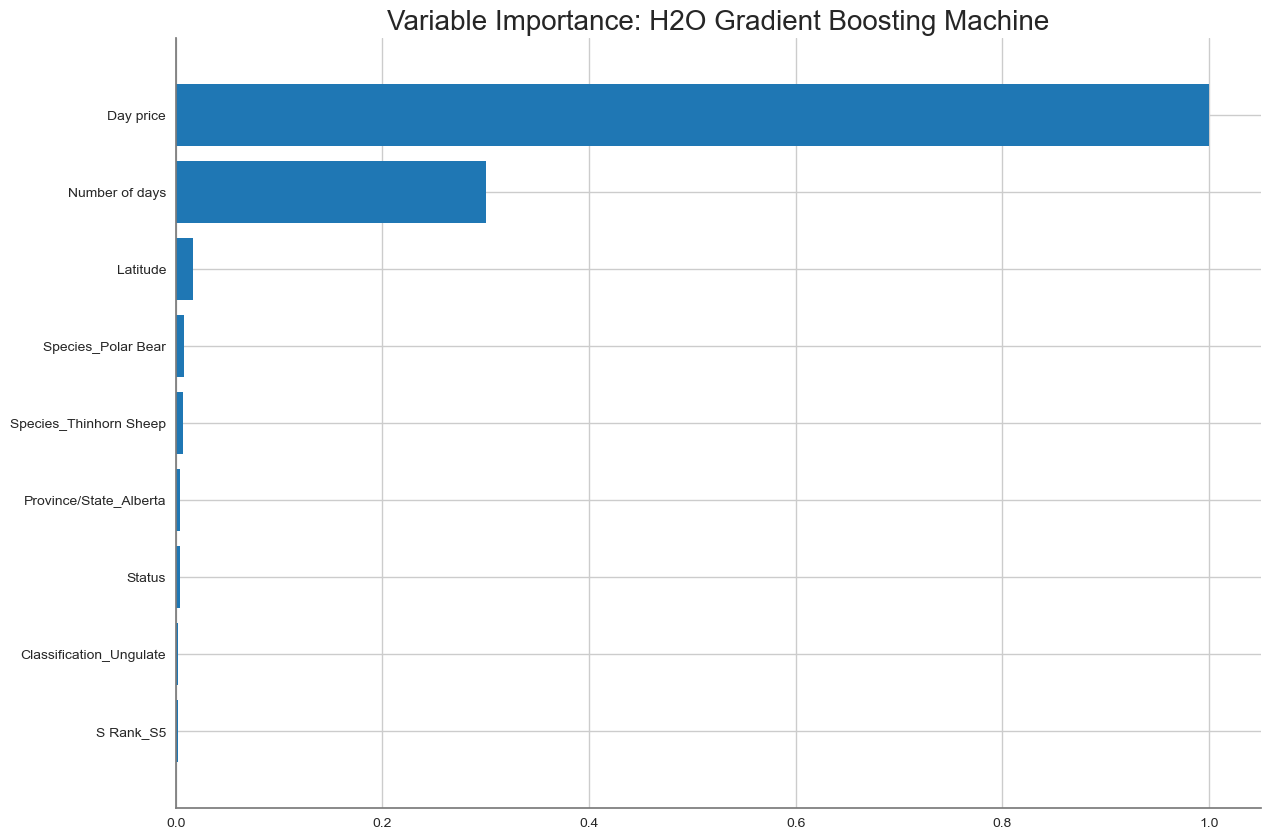

<Figure size 800x550 with 0 Axes>

In [ ]:
#plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\subha\AppData\Local\Temp\ipykernel_560\948732966.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


360
glm


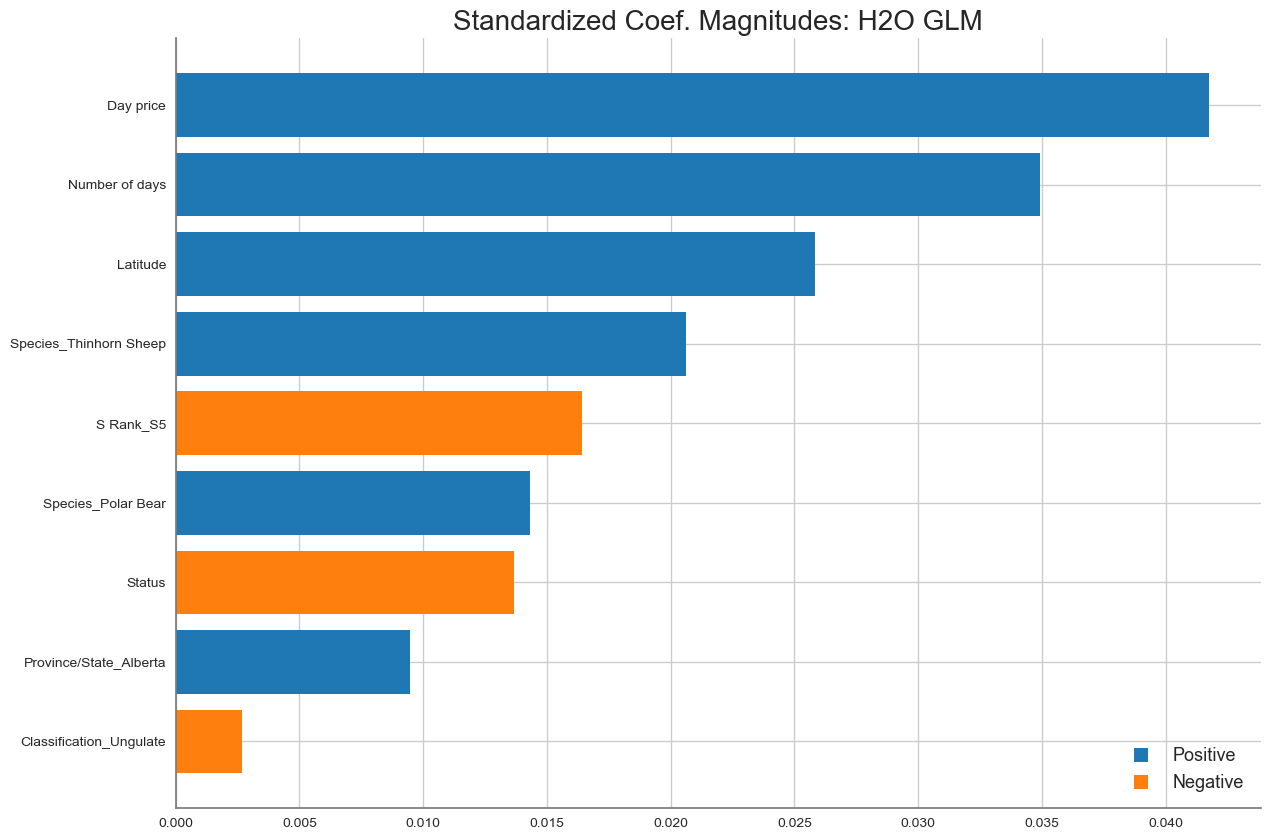

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo)
  glm_model1.std_coef_plot()

From the above analysis, Day price and Number of days are the most important features. Whereas features such as lalitute, Species_Polar Bear, Classification_Ungulate, Species_Thinhorn Sheep, S Rank_S5 holding comparitively less importance. Province/State_Alberta and Status have the least importance.

Checking if assumptions violated

Checking if the model has violated any assumptions. For linear regression some of the assumptions are:

(1)There needs to be linear relation between the independent and dependent variable.

(2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.

(3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.

(4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.

In [ ]:
#Seperating the predictor and target variables
A=dfpd1.drop(['Price'],axis=1)
B=dfpd1['Price']

In [ ]:
#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

Here we check if the Homoscedasticity (normality of the error distribution) assumption is satisfied. A normal distribution of errors is expected.

In [ ]:
cols1 = ['Day price', 'Number of days', 'Latitude', 'Species_Thinhorn Sheep', 'Species_Polar Bear', 'S Rank_S5', 'Status', 'Classification_Ungulate', 'Province/State_Alberta']
model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()


In [ ]:
b_pred = model1.predict(sm.add_constant(A_train[cols1]))

In [ ]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.5217655951985054e-11


C:\Users\subha\AppData\Local\Temp\ipykernel_560\3040778317.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


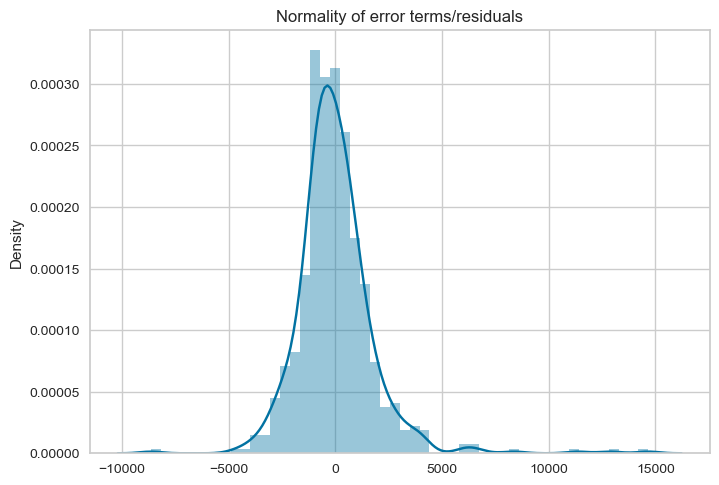

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

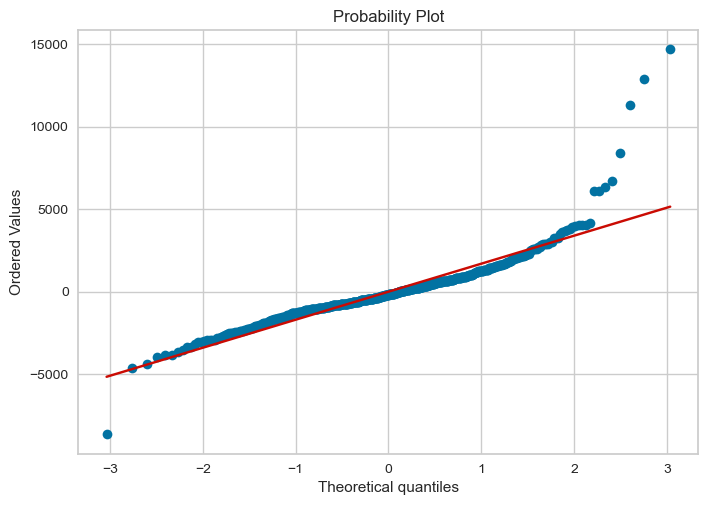

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Price', ylabel='Count'>

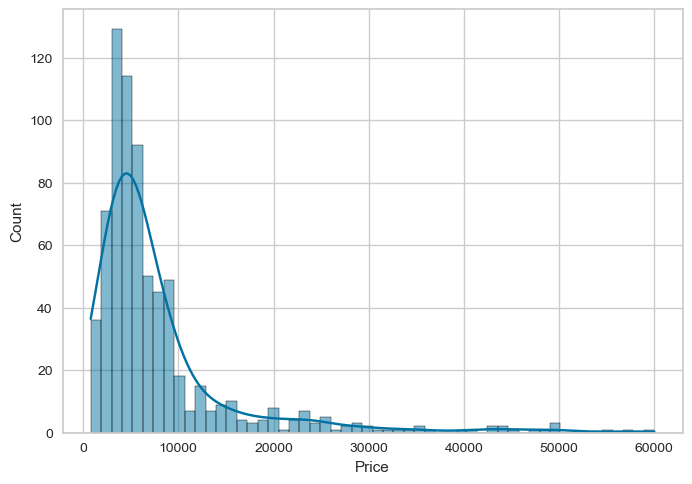

In [ ]:
sns.histplot(dfpd.Price, kde = True)

Ideally for the scatterplot the result should be scattered and it should not have any particular pattern.When the same is plotted as distplot it should follow a bell curve pattern.Both the plots give the expected result so even this assumptions are satisfied.

Ridge Regression

Regression aims to identify patterns within a dataset and apply these patterns to predict target values for new sets of independent variables. However, in real-world scenarios, the target dataset may contain random noise, which can lead to significant errors in predicting correct target values, especially for test datasets. To address this issue, regularization techniques are employed. Regularization involves adjusting the random noise function by introducing an additional term to control the function's fluctuations. This term helps to prevent coefficients from taking extreme values, thereby minimizing the impact on predicting target values for test data. In this particular model, Ridge Regularization is utilized.

To implement Ridge Regularization, we utilize the H2OGeneralizedLinearEstimator. This estimator enables us to fit a generalized linear model by specifying a response variable, a set of predictors, and describing the error distribution.

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
animal_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
animal_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [ ]:
#Model details with regularization
animal_glm_regularization.train(x = X1, y = y1_numeric, training_frame = df_h2o_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708387497830_51


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  9                             9                              1                       py_14_sid_a314

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 3659974.4389199964
RMSE: 1913.1059664639583
MAE: 1272.4106791562865
RMSLE: NaN
Mean Residual Deviance: 3659974.4389199964
R^2: 0.948736960183451
Null degrees of freedom: 574
Residual degrees of freedom: 565
Null deviance: 41052682593.73919
Residual deviance: 2104485302.378998
AIC: 10343.735178019997

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  -----------------
    2024-02-19 19:19:58  0.000 sec   0             41052682593.73919          71395969.72824207
    2024-02-19 19:19:58  0.012 sec   1                                                           1913.1059664639583  3659974.4389199964   1272.4106791562865  0.948736960183451

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
Day price                5784.42                1                    0.494078
Number of days           3588.92                0.620445             0.306548
Species_Thinhorn Sheep   601.443                0.103976             0.0513724
Latitude                 547.963                0.0947309            0.0468044
Species_Polar Bear       407.044                0.070369             0.0347677
Province/State_Alberta   322.987                0.0558374            0.027588
Status                   282.874                0.0489026            0.0241617
S Rank_S5                97.5091                0.0168572            0.00832876
Classification_Ungulate  74.3562                0.0128546            0.00635115

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
#Model details without regularization
animal_glm.train(x = X1, y = y1_numeric, training_frame = df_h2o_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708387497830_52


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              9                             9                              1                       py_14_sid_a314

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 3659901.845158382
RMSE: 1913.0869936200972
MAE: 1274.1891137768628
RMSLE: NaN
Mean Residual Deviance: 3659901.845158382
R^2: 0.9487379769601947
Null degrees of freedom: 574
Residual degrees of freedom: 565
Null deviance: 41052682593.73919
Residual deviance: 2104443560.9660695
AIC: 10343.72377306961

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  ------------------
    2024-02-19 19:20:03  0.000 sec   0             41052682593.73919          71395969.72824207
    2024-02-19 19:20:03  0.013 sec   1                                                           1913.0869936200972  3659901.845158382    1274.1891137768628  0.9487379769601947

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
Day price                5793.06                1                    0.494015
Number of days           3594.64                0.620508             0.30654
Species_Thinhorn Sheep   599.204                0.103435             0.0510983
Latitude                 554.566                0.0957294            0.0472917
Species_Polar Bear       405.449                0.0699886            0.0345754
Province/State_Alberta   321.991                0.0555821            0.0274584
Status                   285.682                0.0493145            0.0243621
S Rank_S5                96.5851                0.0166725            0.00823648
Classification_Ungulate  75.3186                0.0130015            0.00642294

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

The MSE, RMSE, and R^2 values are almost identical for both models.

The MAE is slightly lower for the model with regularization compared to the one without regularization, indicating slightly better performance in terms of average prediction error.

Overall, both models perform similarly, but the model with regularization may have a slight advantage in terms of generalization to unseen data due to its potential to prevent overfitting.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_2_20240219_191238_model_87,682.902,466355,261.107,0.0561754,466355,292,0.018178,GBM
StackedEnsemble_BestOfFamily_4_AutoML_2_20240219_191238,708.021,501294,348.303,0.0680977,501294,123,0.029264,StackedEnsemble
GBM_grid_1_AutoML_2_20240219_191238_model_293,712.533,507704,297.754,0.0648587,507704,102,0.012546,GBM
GBM_grid_1_AutoML_2_20240219_191238_model_174,734.962,540169,486.368,0.136858,540169,122,0.015049,GBM
GBM_grid_1_AutoML_2_20240219_191238_model_244,744.164,553780,406.978,0.0913788,553780,225,0.019963,GBM
GBM_grid_1_AutoML_2_20240219_191238_model_181,759.079,576200,299.153,0.051886,576200,94,0.013417,GBM
GBM_grid_1_AutoML_2_20240219_191238_model_323,793.466,629588,270.175,0.0544377,629588,293,0.019147,GBM
GBM_grid_1_AutoML_2_20240219_191238_model_301,821.356,674625,498.977,0.124986,674625,104,0.014452,GBM
GBM_grid_1_AutoML_2_20240219_191238_model_47,830.932,690447,302.855,0.0622656,690447,218,0.01723,GBM
GBM_grid_1_AutoML_2_20240219_191238_model_300,842.624,710015,428.84,0.0959796,710015,217,0.018823,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

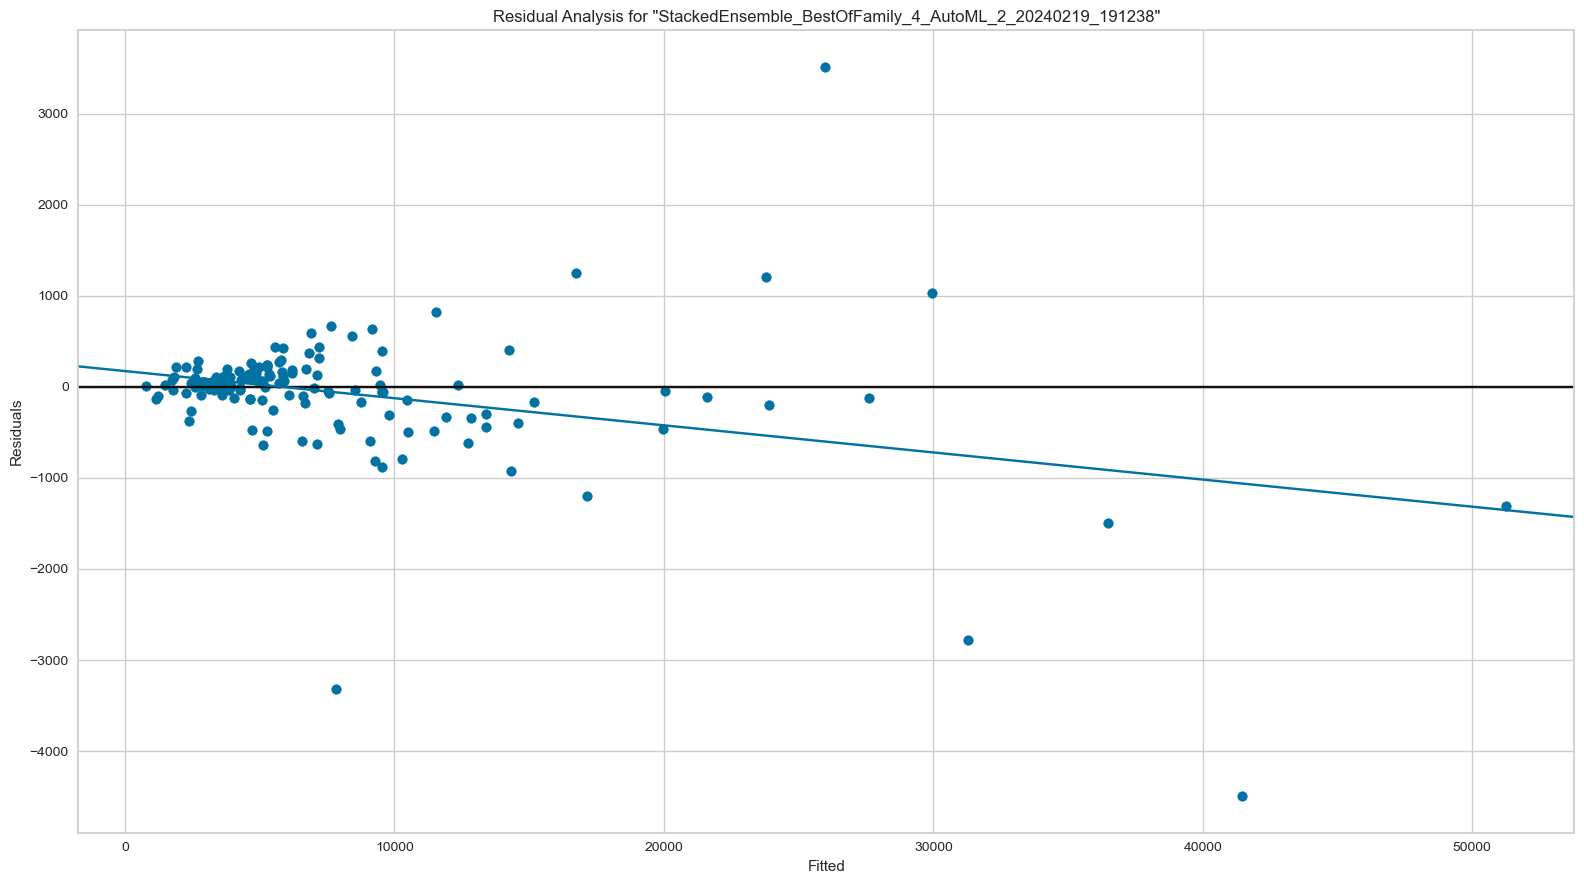

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

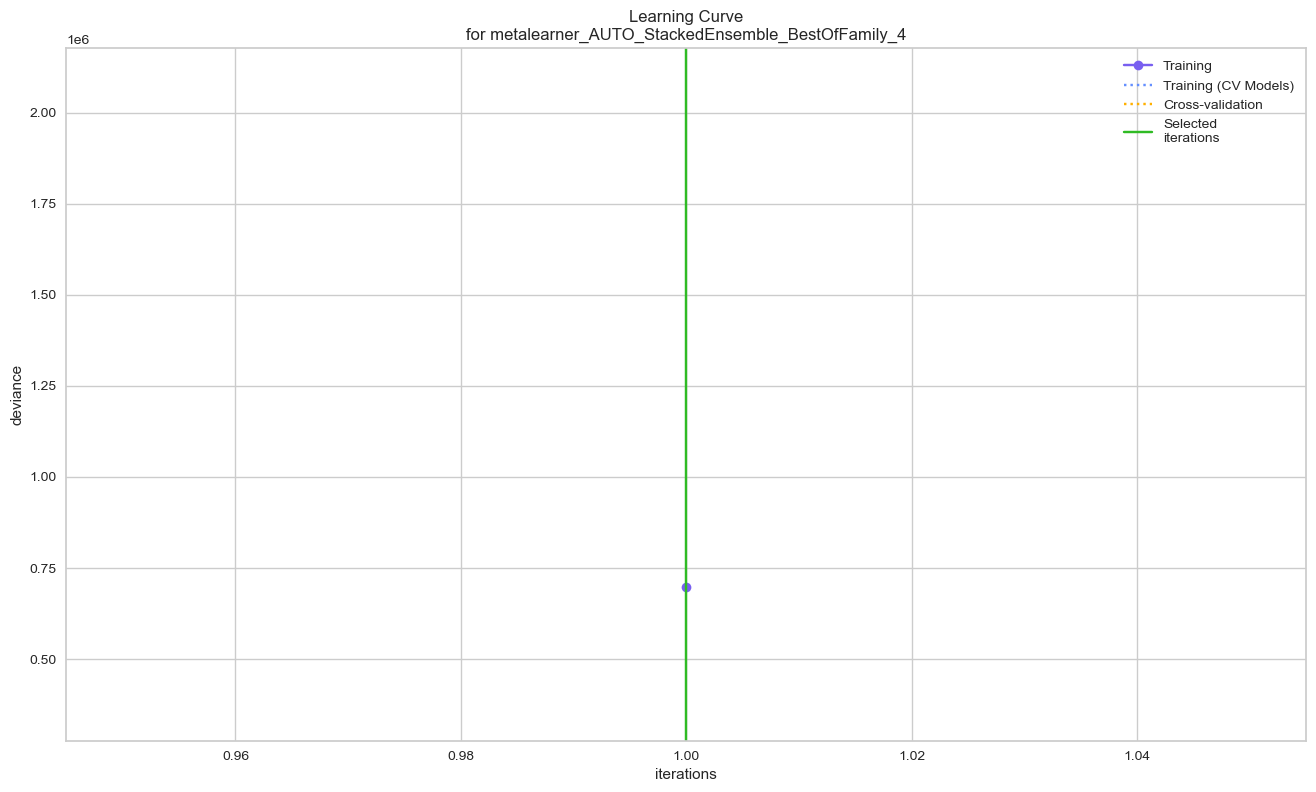

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

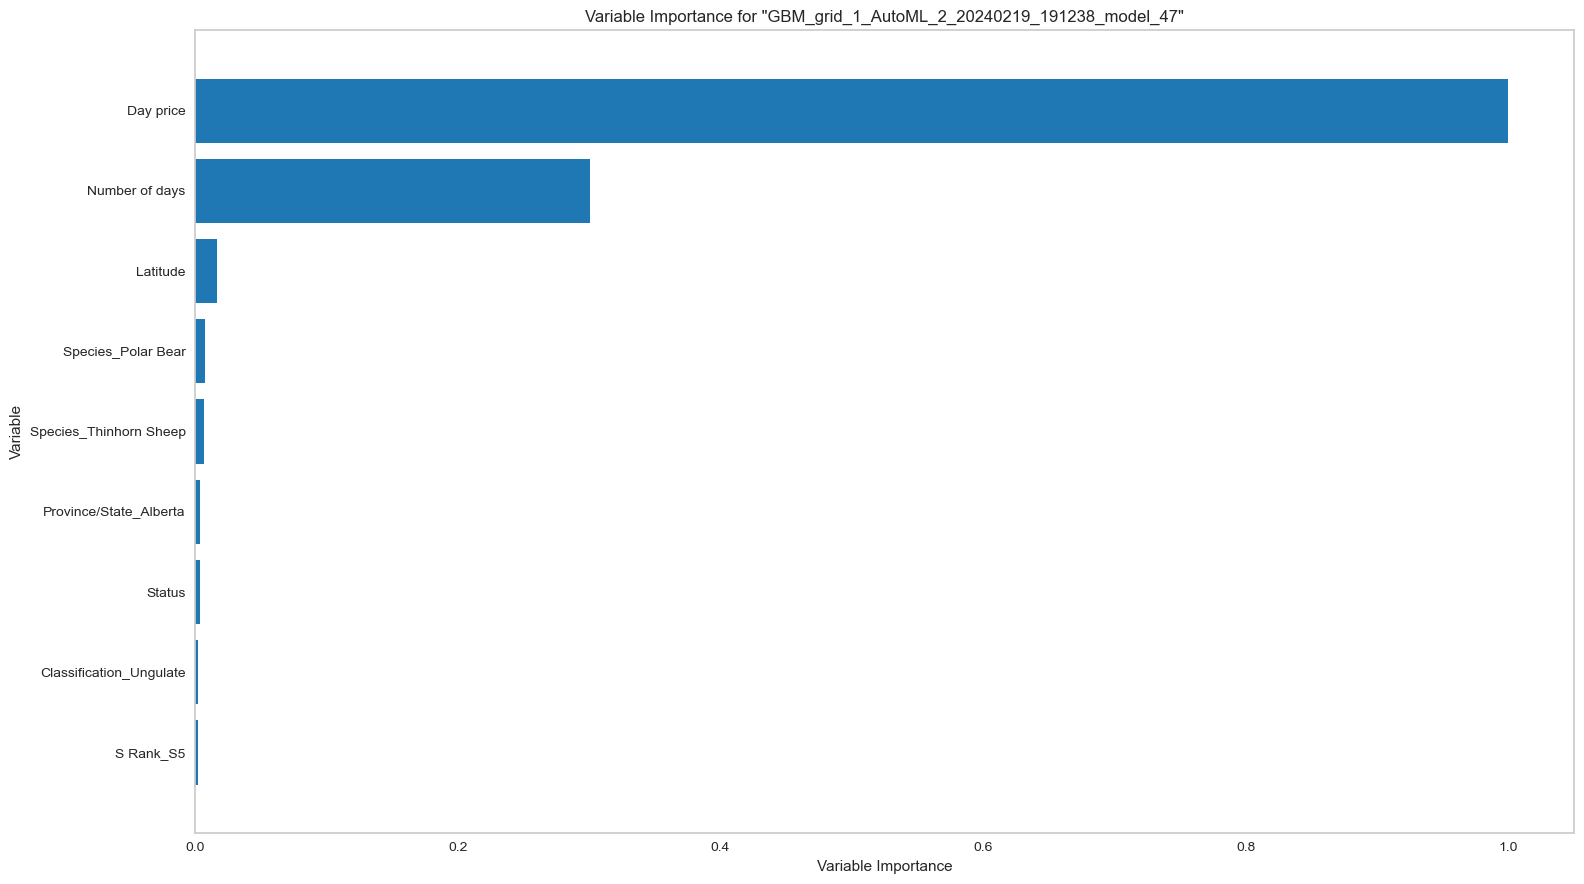

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

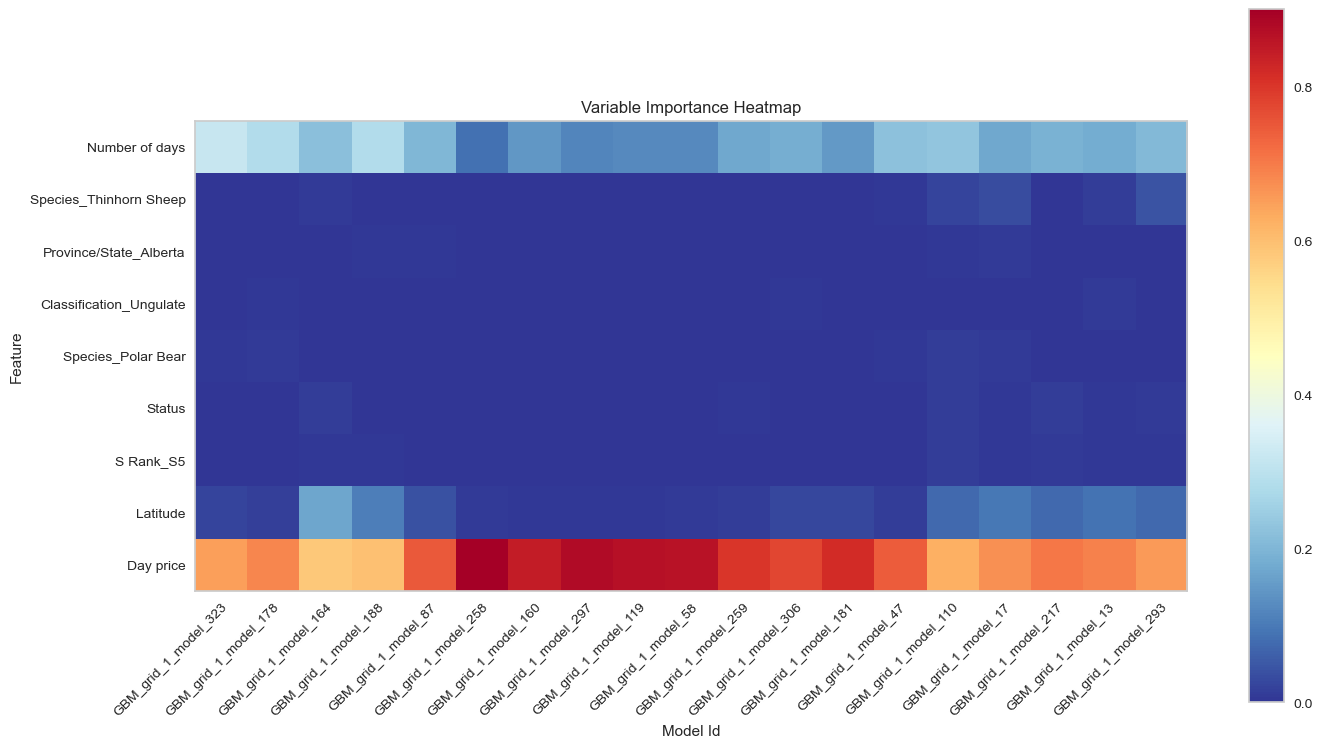

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

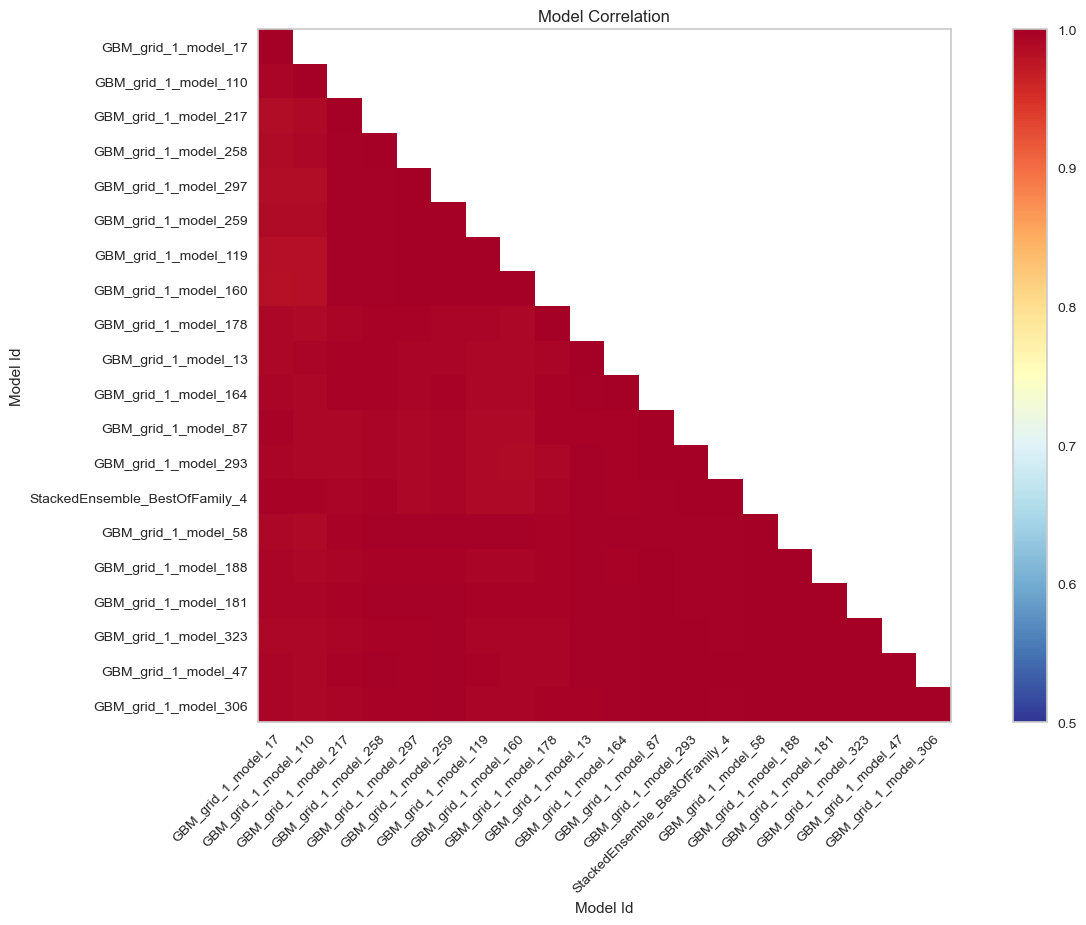

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

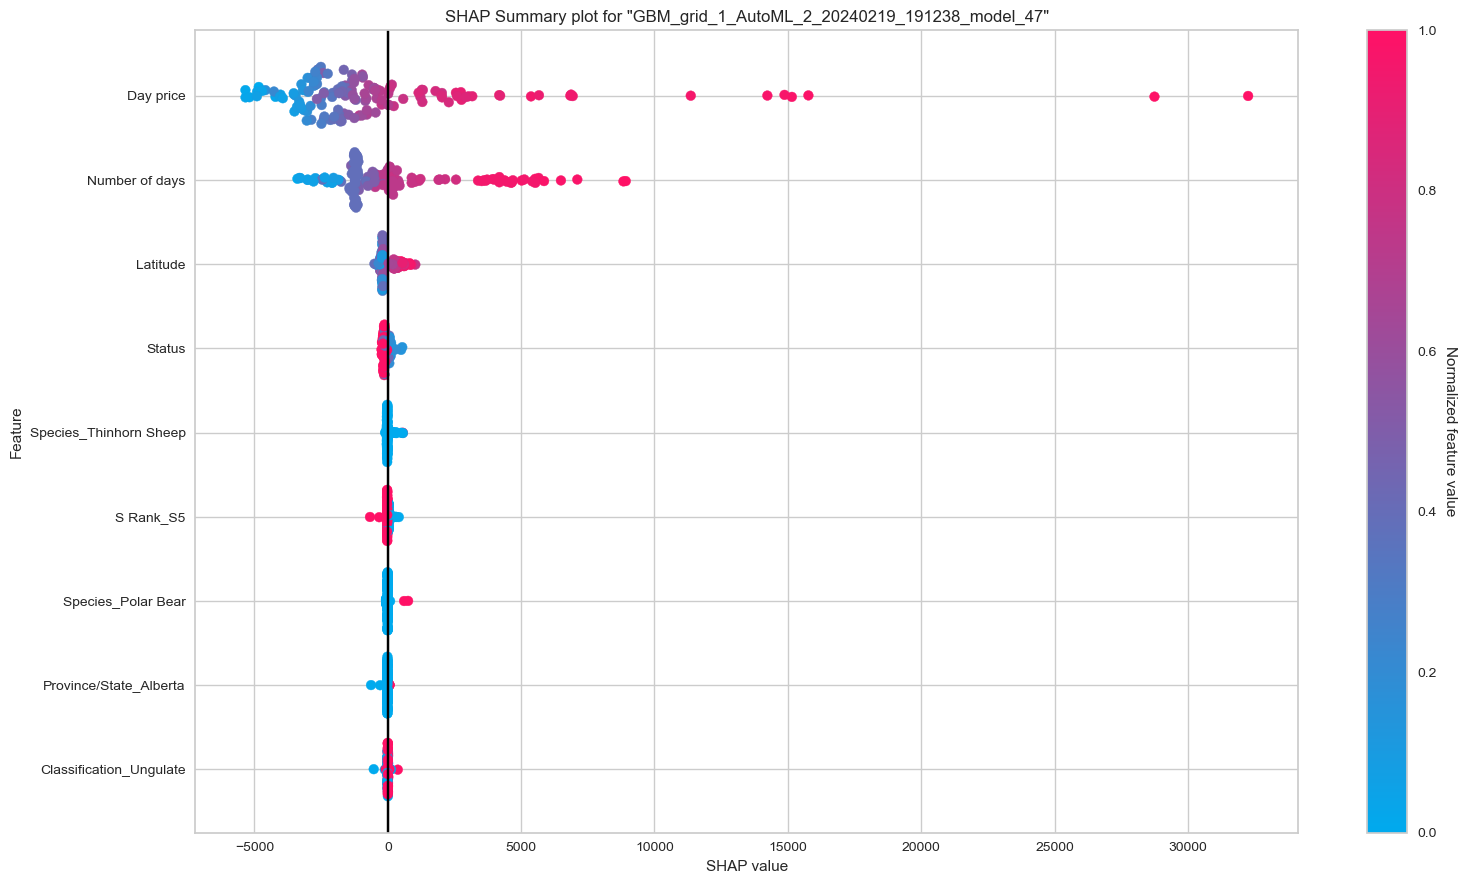

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

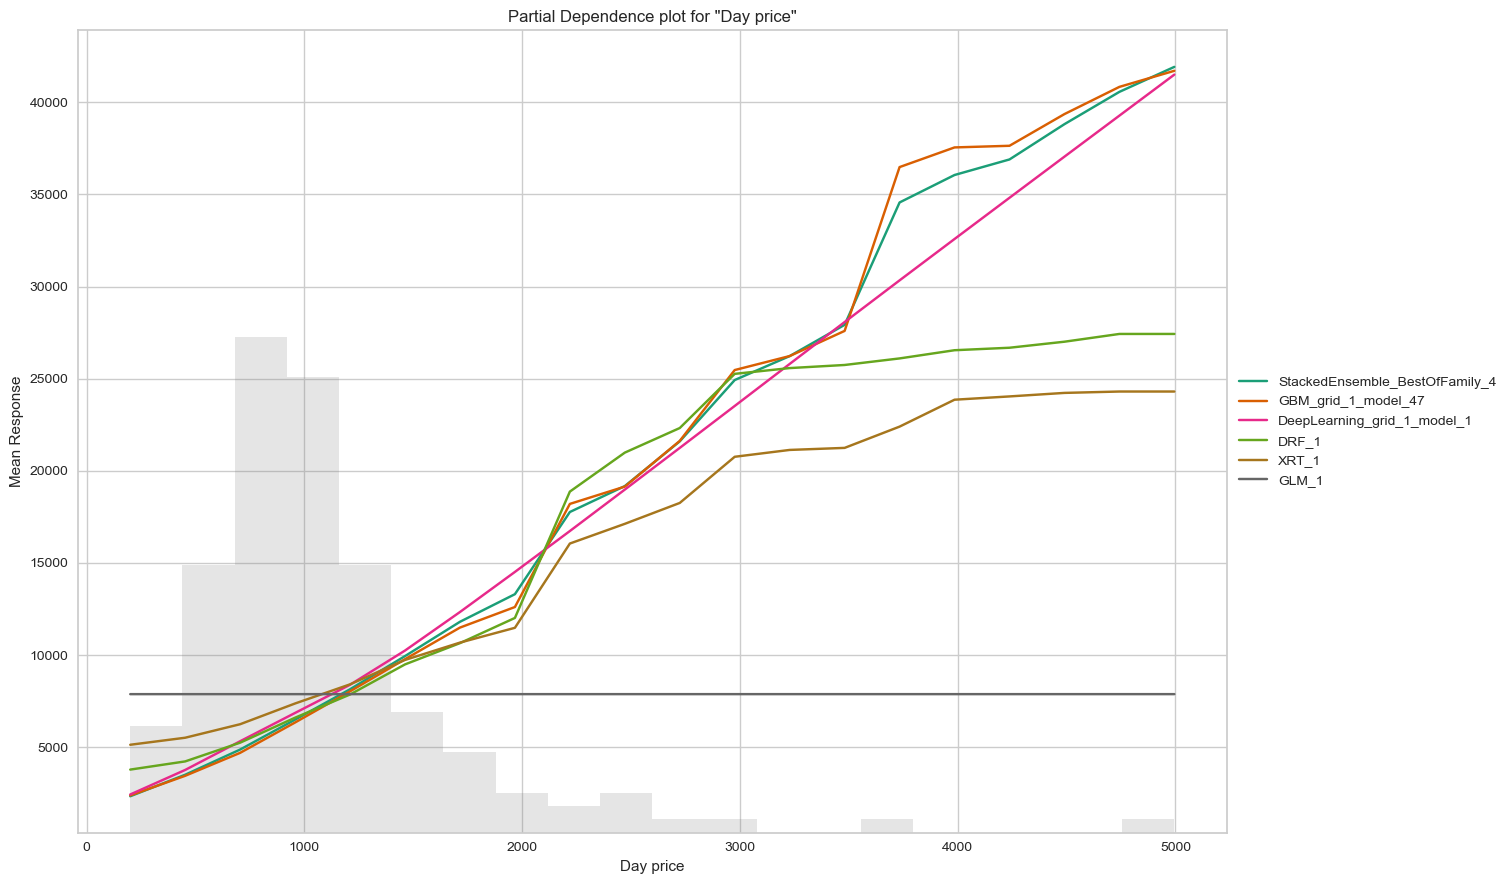

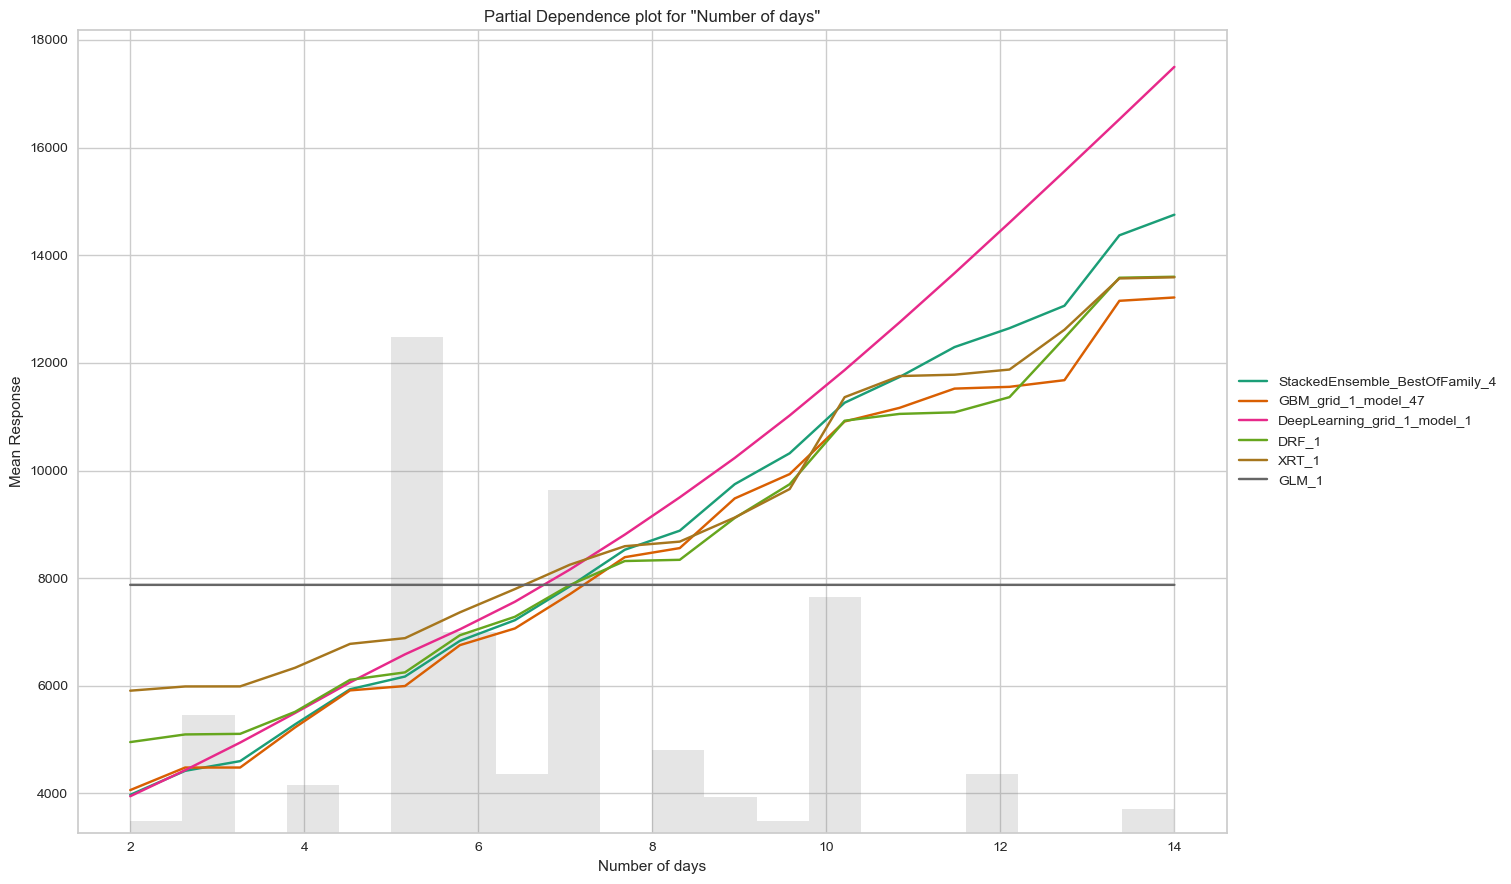

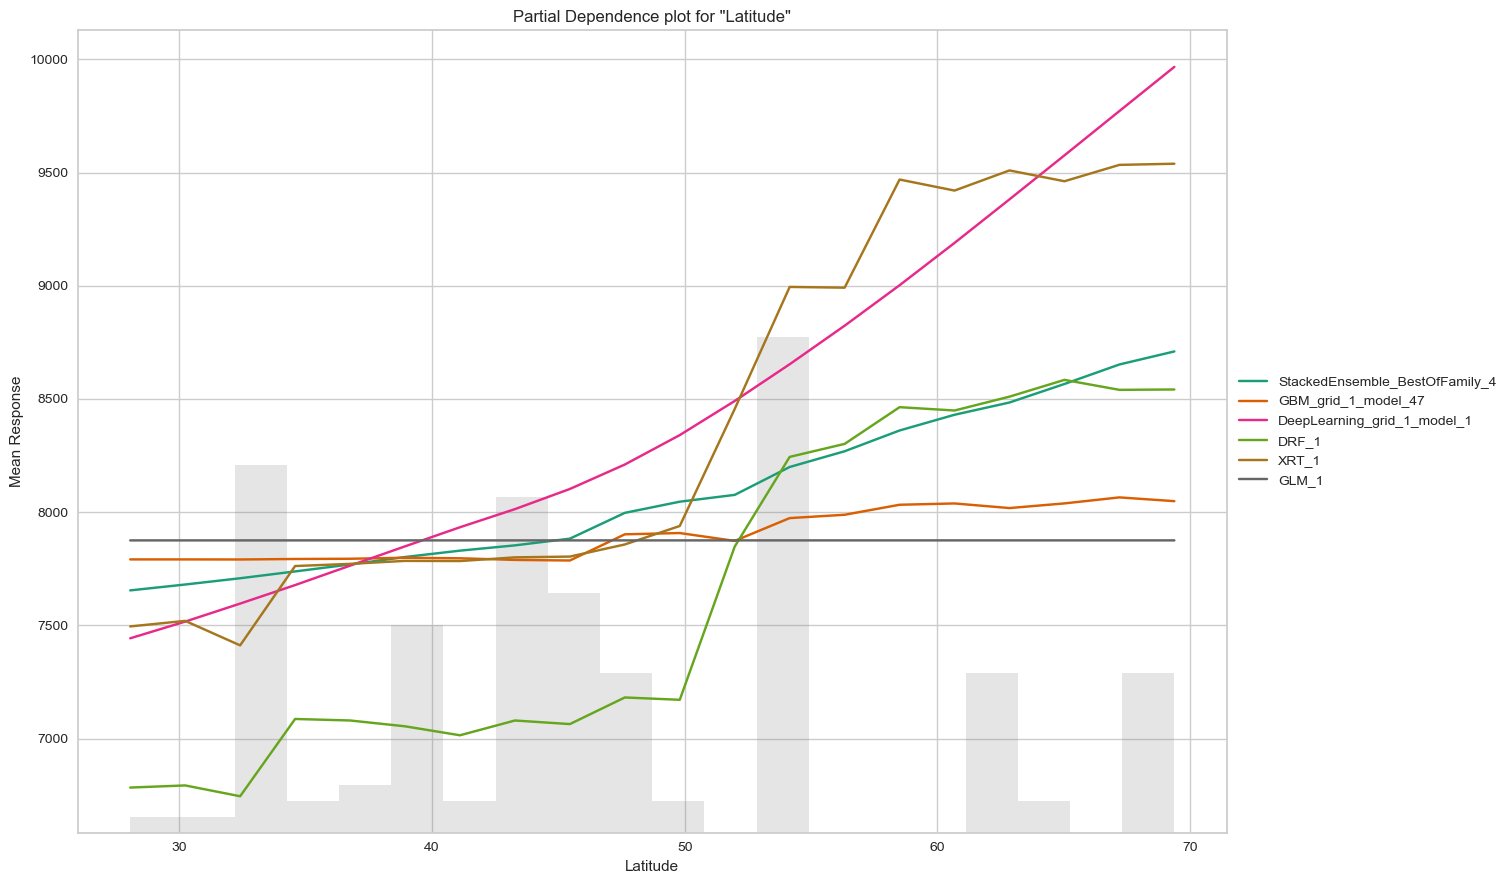

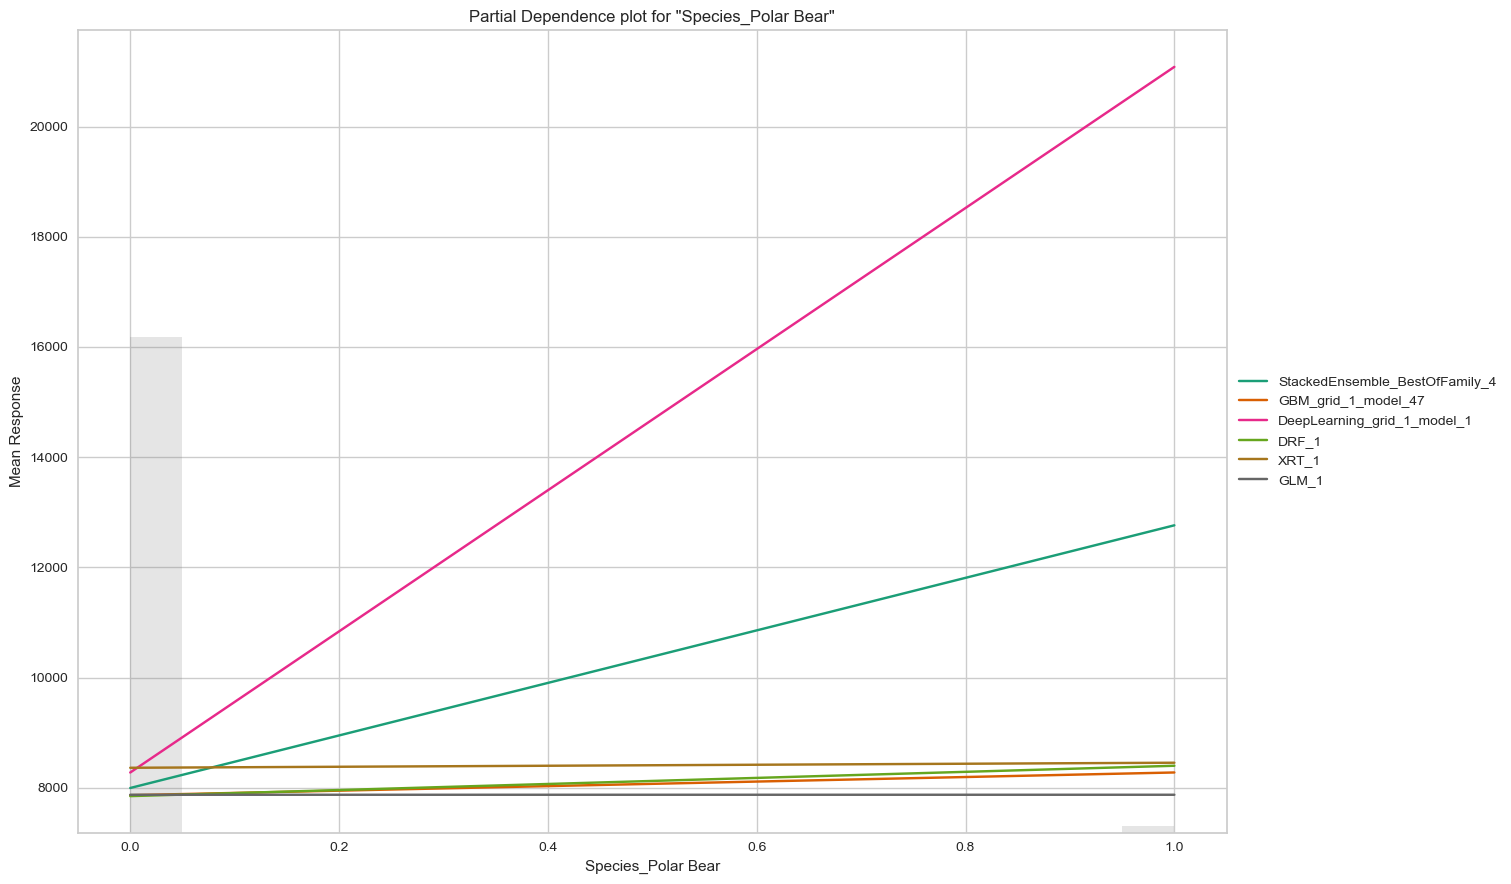

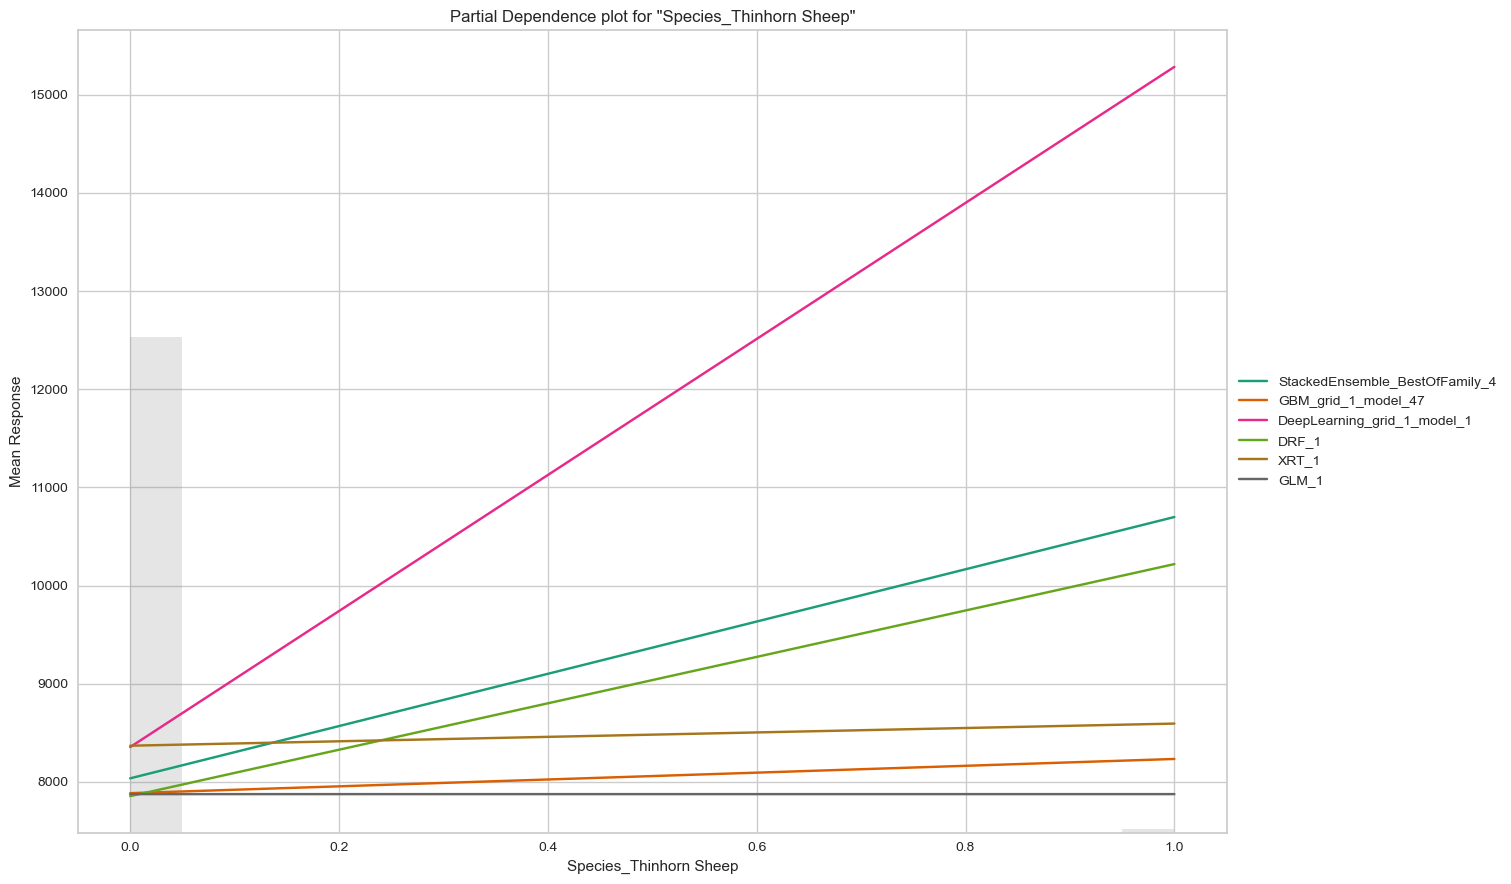

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

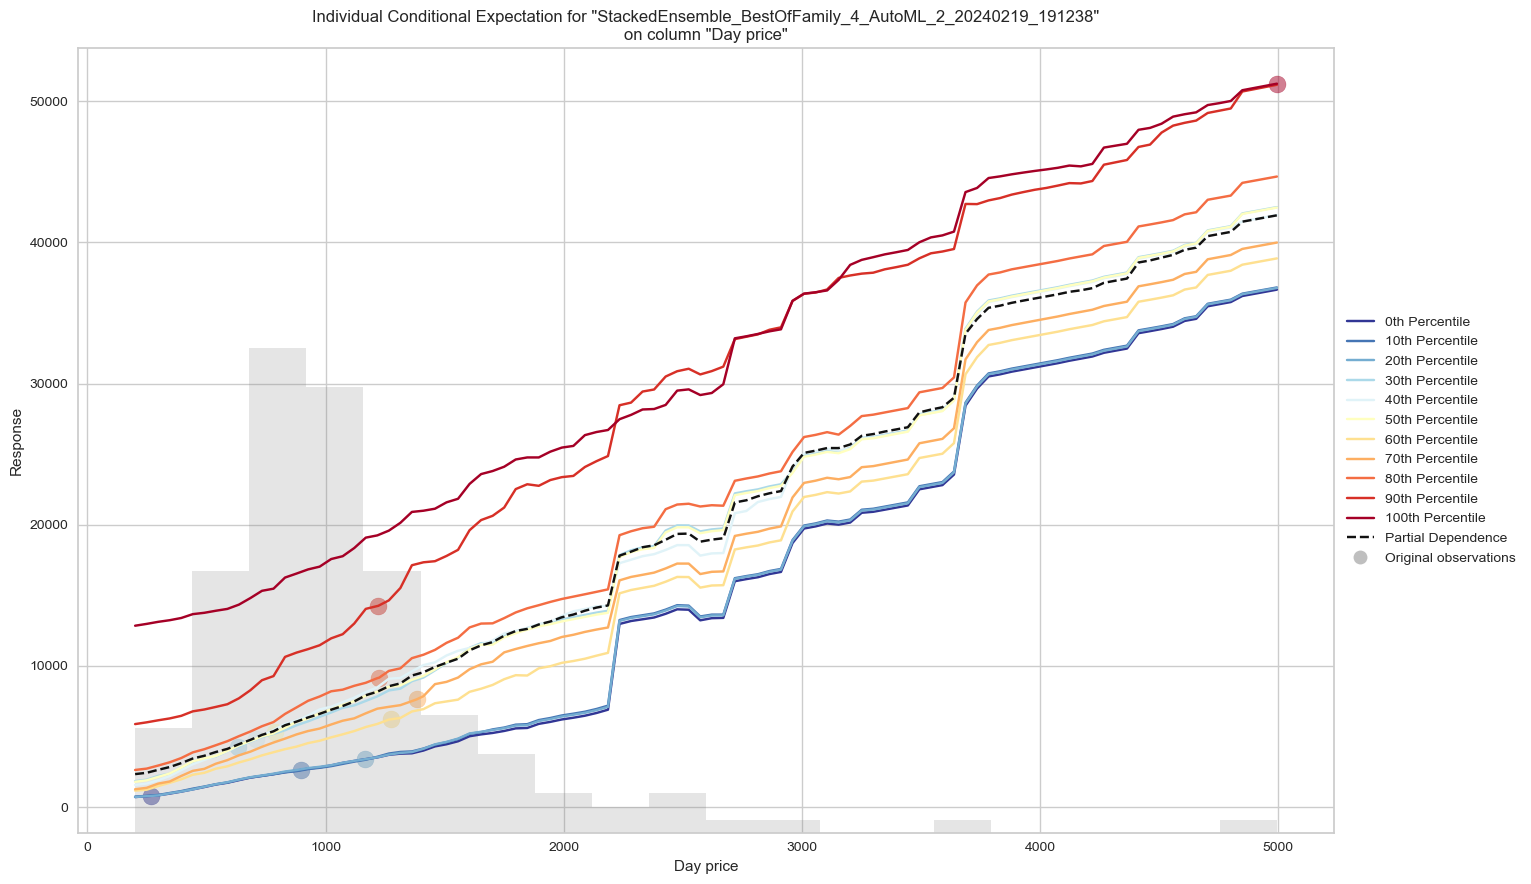

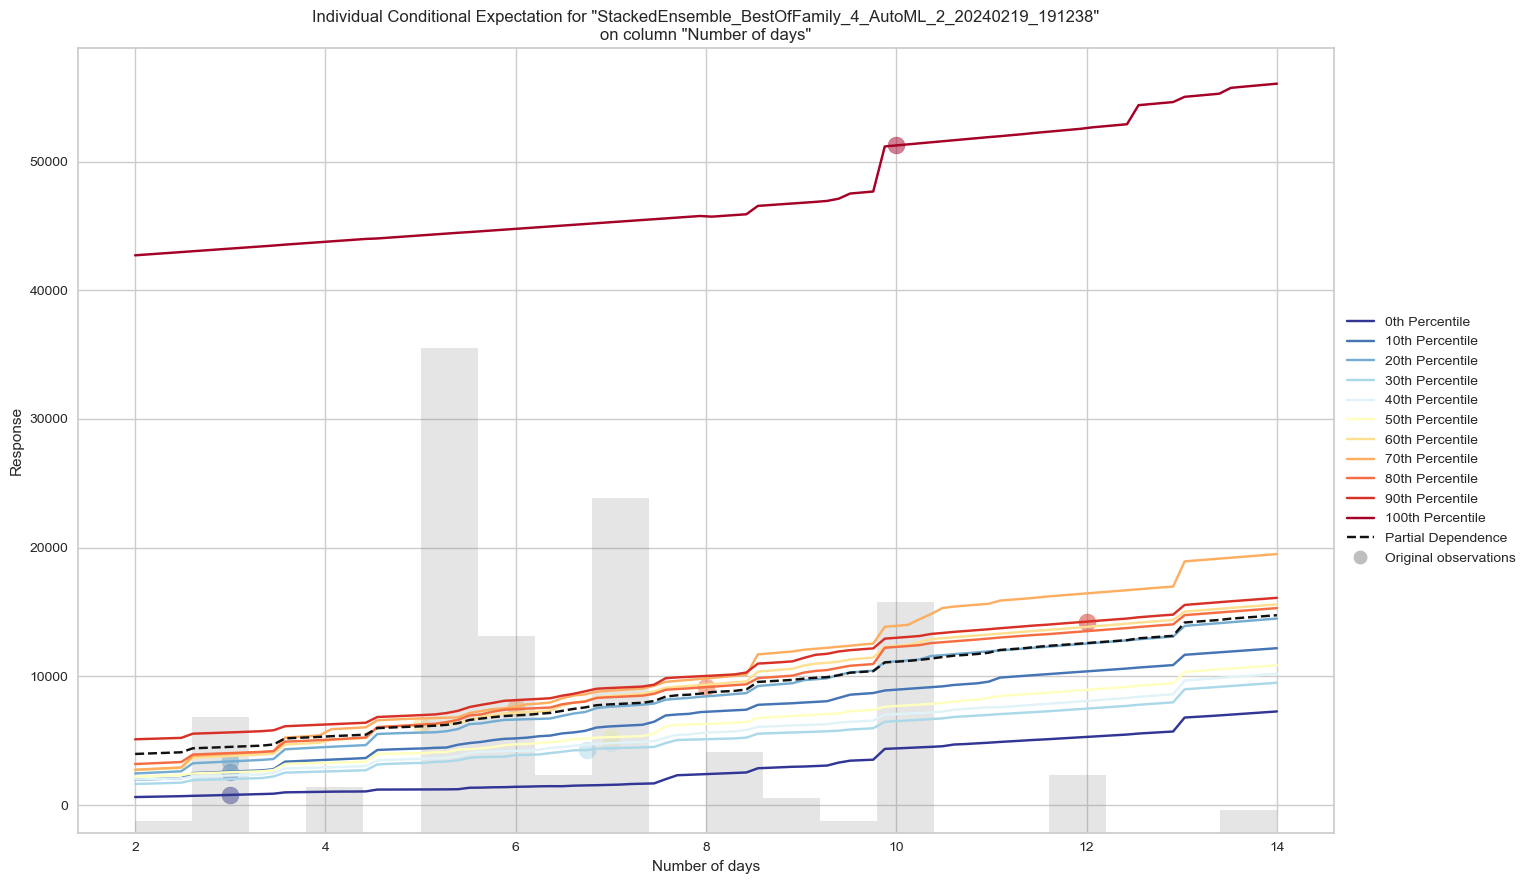

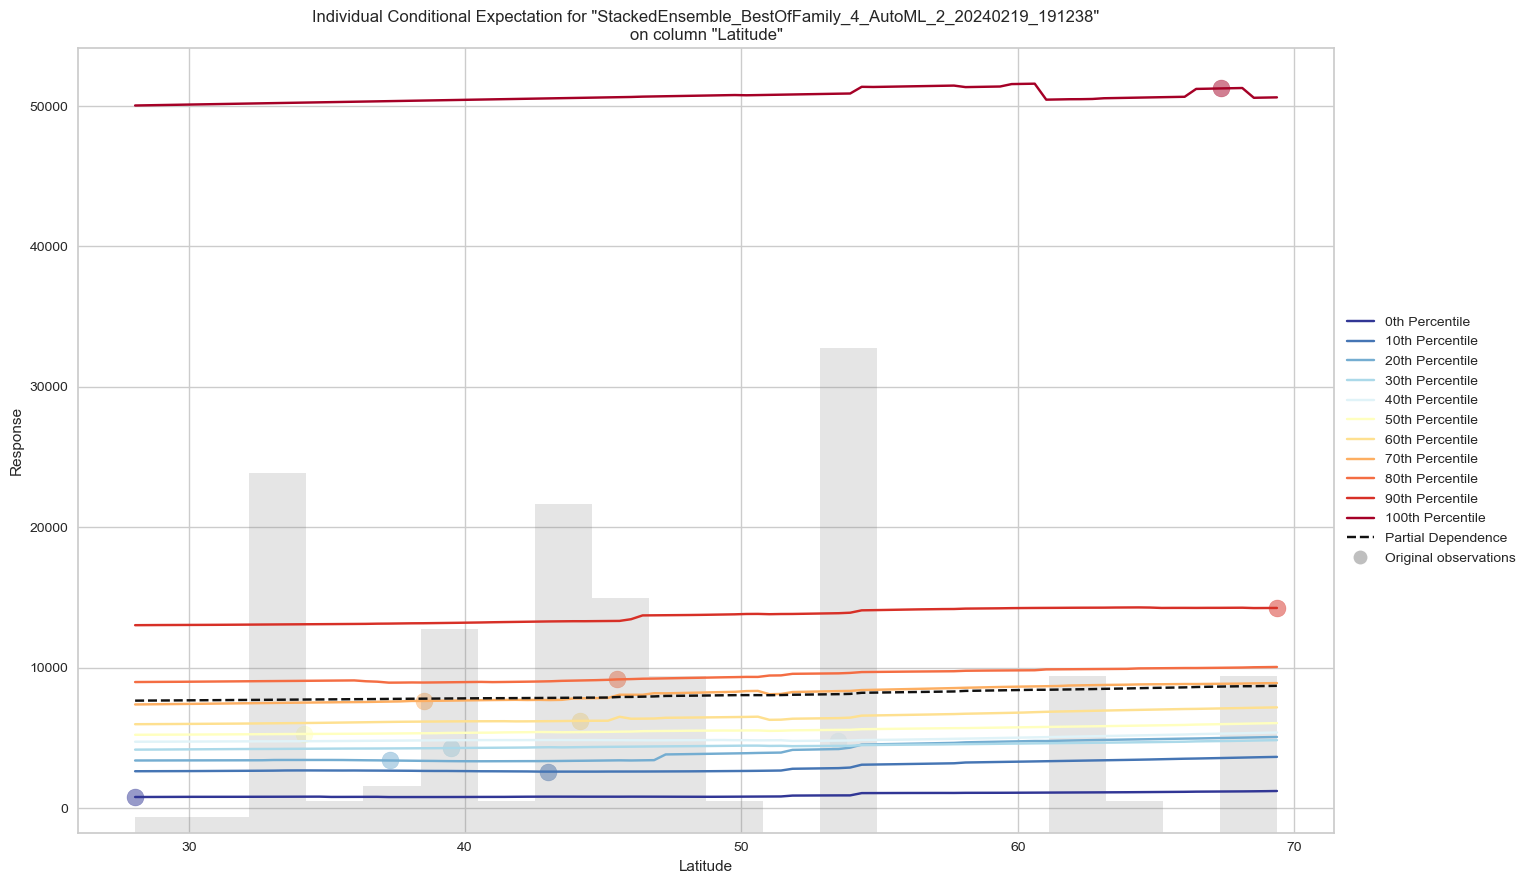

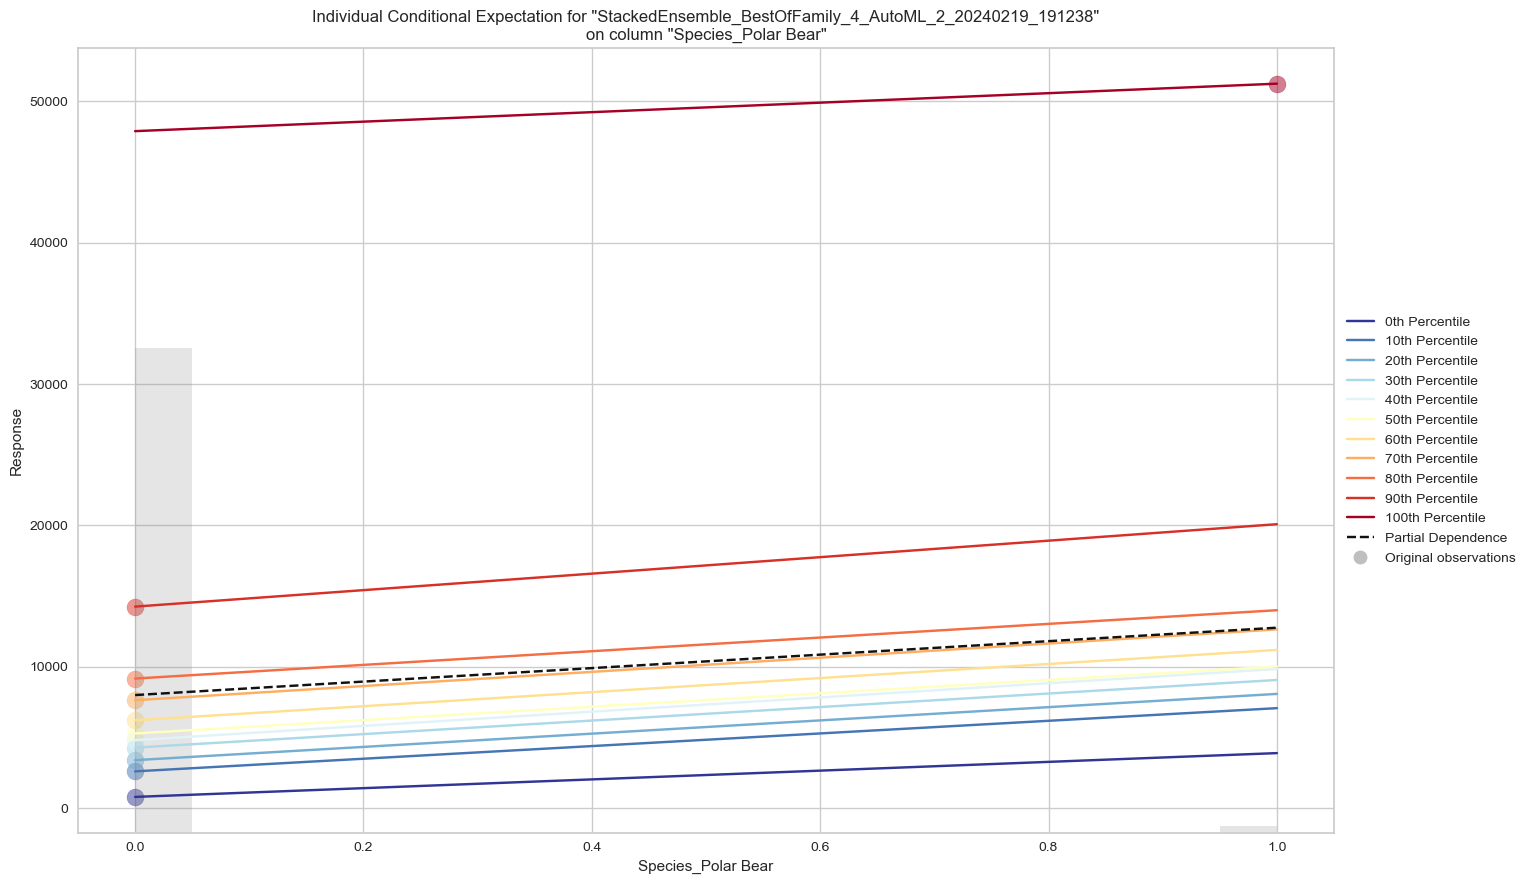

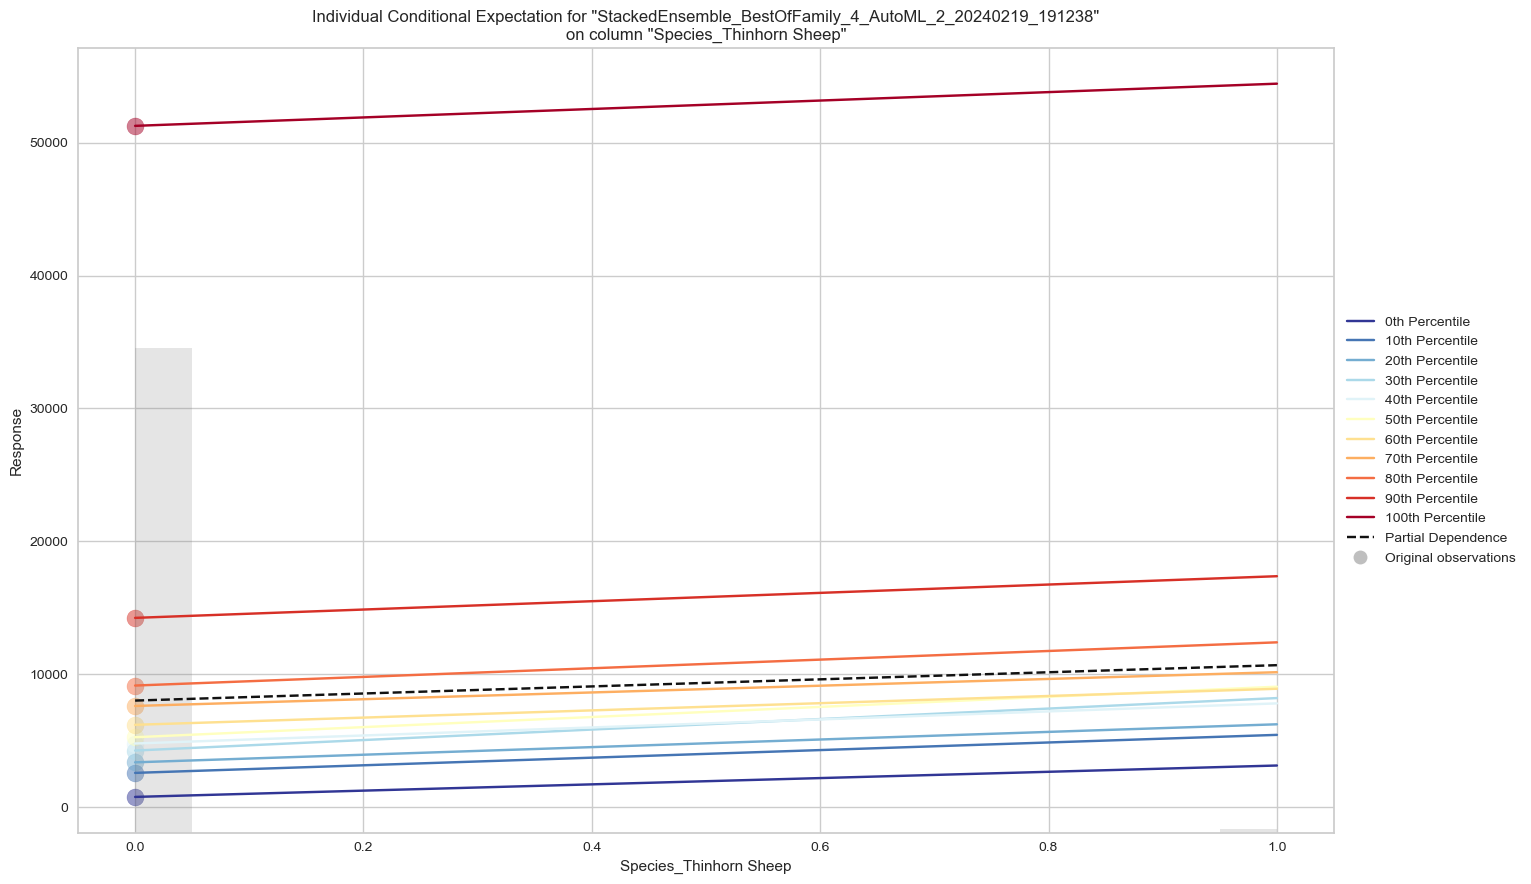

In [ ]:
exa = aml1.explain(df_h2o_test)

Hyper Parameter tuning

Hyperparameter tuning involves systematically searching through a range of hyperparameter values to find the optimal combination that maximizes a model's performance on a given dataset. By exhaustively exploring different hyperparameter settings, this process aims to enhance the model's effectiveness in capturing the underlying patterns within the data.

In [ ]:
s = dfpd1['Price']

t = dfpd1.drop(['Price'], axis = 1)

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

Here we use RandomizedSearchCV to get the best params inorder to acheive the optimal results.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)


C:\Users\subha\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
random_rf.best_params_

{'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 800}

n_estimators: The optimal number of decision trees in the random forest is found to be 300.

min_samples_split: For internal node splitting, the model achieves best performance when at least 2 samples are required.

max_depth: The maximum depth of individual decision trees in the forest is determined to be 800.

These hyperparameters play a crucial role in regulating the complexity and effectiveness of the Random Forest model, ensuring optimal performance based on the specified evaluation metric, which in this case is accuracy.

**CONCLUSION**

Employed advanced techniques like VIF and p-values to refine the model by identifying and excluding redundant independent variables.

Leveraged the H2O.ai framework to train and assess the variables within the hunting price for animals dataset.

Identified the 'gbm' model as the top performer, achieving an impressive 98% accuracy on the test dataset.

Recognized that while the linear regression model shows promise in predicting hunting prices for the animals, there are still areas where accuracy can be improved.

Further improvement could involve investigating outlier removal techniques and incorporating ensemble or boosting methods to improve predictive performance.

**Assignment Questions**-

Q1) Is the relationship significant?

Statistically significant relationships are identified when the p-value for variables is below 0.05.

In this case, all the independent variables have a p-value of 0, implying that they are highly statistically significant.

A p-value of 0 suggests that the observed relationship between each independent variable and the dependent variable is unlikely to be due to chance alone.

The low p-values indicate strong evidence against the null hypothesis, which states that the coefficient of the independent variable is equal to zero

In this model, Features with higher P-value and VIF values were filtered and removed to have significant model. From the OLS method, R-squared score was observed to be close to 0.97 which is a really good score to show the significance of the model.  

Therefore, for the selected dataset, the relationships are deemed significant.

Q2) Are any model assumptions violated?

Linear relationship- The linearity assumption in regression analysis is met when the relationship between the dependent variable and each independent variable remains linear while holding other variables constant. Upon plotting the target variable against each independent variable individually, we observed a linear relationship for some variables(day price, latitude), thus upholding this assumption.

Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.

No or little multicollinearity- This can be determined by correlation matrix.

Variables such as "Price" and "Day price" exhibit a strong positive correlation (0.903). "Number of days" also shows a moderately strong positive correlation with both "Price" (0.748) and "Day price" (0.480).

Since both day price and Number of days are very important features in the model, the model assumuptions were violated.

The Durbin-Watson statistic value reported in the OLS Regression Results is 0.769. This value indicates that there is a positive autocorrelation present in the residuals of the regression model.

Typically, for the Durbin-Watson statistic, values between 1.5 and 2.5 suggest no autocorrelation, while values below 1.5 indicate positive autocorrelation and values above 2.5 suggest negative autocorrelation.

Therefore, the value of 0.769 suggests positive autocorrelation, which violates the model assumptions.

Q3) Is there any multicollinearity in the model?

Multicollinearity occurs when one independent variable is highly correlated with another independent variable in the model.

Multicollinearity can be detected by computing the correlation matrix or calculating the Variance Inflation Factor (VIF) for all variables.

A correlation coefficient closer to +1 or -1 in the correlation matrix indicates high correlation between two variables.

A VIF value above 10 suggests multicollinearity as seen above with 'SCI_N' and 'SCI_Y' features.

In the current model, some variables exhibited VIF values greater than 10 and p-values greater than 0.05.

To address this issue, columns with high VIF values and insignificant p-values were dropped from the model.

From the correlation matrix, Variables such as "Price" and "Day price" exhibit a strong positive correlation (0.903). "Number of days" also shows a moderately strong positive correlation with both "Price" (0.748) and "Day price" (0.480).

Since both day price and Number of days are very important features in the model, multicollinearity exists in the model.

Q4) In the multivariate models are predictor variables independent of all the other predictor variables?

Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from heatmap and pairplot whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that price and day price are correlated to each other. 'price' and 'number of days' are also correlated to each other. Other than those other predictors are independent from each other.

Q5) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

From the variable importance plot, the most to least important variables are displayed.

'Day price' and 'Number of days' are the most important features. Whereas features such as lalitute, Species_Polar Bear, Classification_Ungulate, Species_Thinhorn Sheep, S Rank_S5 holding comparitively less importance. Province/State_Alberta and Status have the least importance.

VIF and p-values for species_black bear, SCI_N, providence_state british columbia, Avg_Mass, species_sheep bighorn was high than the ideal values. So those variables were excluded from the model.

Q6) Does the model make sense?

A model must adhere to certain assumptions, including appropriate p-values and VIF values within acceptable ranges, to be meaningful. After filtering out the insignificant features with help of VIF value and OLS method, model was very significant.

The root mean square error (RMSE) should be minimized while considering the range of the target variable's minimum and maximum values.

An R-squared (R2) value of 0.97 indicates a very good level of accuracy for the model.

Overall, the model is deemed satisfactory based on these criteria.

To enhance accuracy, additional variables may be dropped based on their importance.

Outliers could be removed to improve model performance.

Consideration of alternative modeling techniques, such as boosting or ensemble methods, may also enhance predictive capabilities.

Q7) Does regularization help?

Regularization is employed to mitigate the impact of random noise by introducing an additional term to the function, thereby controlling extreme coefficient values.

The primary objective of regularization is to minimize validation loss and enhance model accuracy.

In this model, Ridge Regularization was applied during training to achieve these goals.

The MSE, RMSE, and R^2 values are almost identical for both models.

The MAE is slightly lower for the model with regularization compared to the one without regularization, indicating slightly better performance in terms of average prediction error.

Overall, both models perform similarly, but the model with regularization may have a slight advantage in terms of generalization to unseen data due to its potential to prevent overfitting.

Q8) Which independent variables are significant?

Variables are significant when p-value is less than 0.05.

'Day price', 'Number of days', 'Latitude', 'Species_Thinhorn Sheep', 'Species_Polar Bear', 'S Rank_S5', 'Status', 'Classification_Ungulate', 'Province/State_Alberta' variables have p-value less than 0.05.

So, it can be said that all variables are significant.

Q9) Which hyperparameters are important?

Hyperparameter tuning is a process to optimize the performance of a model by selecting the best combination of hyperparameters.

It involves systematically searching through different values of hyperparameters to identify the subset that yields the highest performance on the dataset.

RandomForestRegressor is a popular model used for hyperparameter tuning, as it can handle a variety of data types and is robust to overfitting.

In this particular model, tuning was performed to optimize the hyperparameters.

The best hyperparameters identified for this model are: 'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 800.

n_estimators: The optimal number of decision trees in the random forest is found to be 300.

min_samples_split: For internal node splitting, the model achieves best performance when at least 2 samples are required.

max_depth: The maximum depth of individual decision trees in the forest is determined to be 800.

These hyperparameters play a crucial role in regulating the complexity and effectiveness of the Random Forest model, ensuring optimal performance based on the specified evaluation metric, which in this case is accuracy.

**LICENSE**

MIT License

Copyright (c) 2024 vineethreddy2000

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**References** -

Mihalik, I., Bateman, A. W., & Darimont, C. T. (2019). Data from: Trophy hunters pay more to target larger-bodied carnivores [Data set]. Zenodo. https://doi.org/10.5061/dryad.vd34vr3

Sckit learn offcial documentation

Refered Towards Data Science

Eli5 official documentation

Aiskunks. (2023). A Crash Course in Statistical Learning [Jupyter Notebook]. GitHub. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

OpenAI's ChatGPT (personal communication, February 18, 2024) suggested the algorithms and code structure.

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). Linear regression and general code referred from Jupyter notebook "In their tutorial on A Crash Course in Statistical Learning, Aiskunks (Year) demonstrated how to implement AutoML for regression using the Melbourne Housing dataset "
